# 1. Project Background

Airbnb made a historic rise in the past decade by allowing everyday homeowners to rent out their homes on their platform. This revolutionized the way people traveled and has become to the go to for many travelers. As we all know for many renters price plays a big factor in the decision making process. So for the host its important that they get the price correct so they can remain competitive with other renters in their area. As of now Airbnb provides with their own recommender system on how they should price their listing. But, with no information on how this is created host have very little knowledge on why they should price their home at a certain price point. So by creating a price predictor, I'm hoping to provide host with a clearer view on what goes into the price. 

# 2. The Dataset 

My dataset was pulled from insideairbnb.com, a website that provides scraped data directly from the airbnb website. The dataset was last scraped on November 18th 2019 and contains the information that was avaible that day. 

The dataset contains 24197 listing and is accompanied with over 106 columns. That provide a robust description of each lising. Another caveat to take note of is that the pricing information that is scraped is of the advertised sticker price and not what renters actually paid. But I believe that pricing is close enough that we can get a decently accurate price. 

In [377]:
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install scikit-learn
# pip install seaborn
# pip install statsmodels
# pip install xgboost

In [378]:
# Importing required libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from statsmodels.tsa.seasonal import seasonal_decompose
import xgboost as xgb
from xgboost import plot_importance
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

# Set plot preference
plt.style.use(style='ggplot')

In [379]:
cape_town = pd.read_csv('capetown.csv')
print(f'This dataset is {len(cape_town)}')
pd.set_option('display.max_columns', len(cape_town.columns))
pd.options.display.max_info_columns = 110
pd.set_option('display.max_rows', 100)

cape_town.head()

This dataset is 24197


/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/3786991570.py:1: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  cape_town = pd.read_csv('capetown.csv')


id                         listing_url     scrape_id last_scraped  \
0   3191   https://www.airbnb.com/rooms/3191  2.019110e+13   11/26/2019   
1  13044  https://www.airbnb.com/rooms/13044  2.019110e+13   11/27/2019   
2  15007  https://www.airbnb.com/rooms/15007  2.019110e+13   11/26/2019   
3  15077  https://www.airbnb.com/rooms/15077  2.019110e+13   11/26/2019   
4  15180  https://www.airbnb.com/rooms/15180  2.019110e+13   11/26/2019   

                                name  \
0            Malleson Garden Cottage   
1     JAMBO Guest House / Green Room   
2                   Blaauwberg House   
3  Top relaxed beach living in style   
4          The Melkbaai - Beachfront   

                                             summary  \
0  This is a lovely, separate, self-catering cott...   
1  The Green Room at Jambo Guest House is a sligh...   
2  Welcome to our self-catering beach-front famil...   
3  Situated either on the ground floor with direc...   
4                                                NaN   

                                               space  \
0  Beautiful self catering luxury cottage in cent...   
1  Jambo, which means hello in Swahili, is a gues...   
2  The house sleeps 6 and has all necessary ameni...   
3  A stunning architect designed guesthouse, Suns...   
4  Self Catering Holiday Apartments available for...   

                                         description experiences_offered  \
0  This is a lovely, separate, self-catering cott...                none   
1  The Green Room at Jambo Guest House is a sligh...                none   
2  Welcome to our self-catering beach-front famil...                none   
3  Situated either on the ground floor with direc...                none   
4  Self Catering Holiday Apartments available for...                none   

                               neighborhood_overview  \
0  Mowbray is on the Southern Suburbs line, 6km (...   
1  Green Point is a popular leisure district domi...   
2  Bloubergstrand is a lovely, cosy suburb near C...   
3  It is probably the best hub in order to explor...   
4  Apartment is located in Beach Road, Strand, We...   

                                               notes  \
0  There are pets on the property. One cat, who w...   
1  Very centrally situated and walking distance t...   
2  Please note we do not provide beach towels at ...   
3  USEFUL TIPS BEFORE ARRIVAL.. There is a Nespre...   
4  Please note the apartment is on the second flo...   

                                             transit  \
0  The train station is about 400m from the cotta...   
1  A lot of big attractions are within walking di...   
2  We're located about 25 minutes drive out on th...   
3  The city bus (Website hidden by Airbnb)  is ab...   
4  Local taxi's (Strand Taxi) can be booked to ge...   

                                              access  \
0  Fully self-contained cottage with separate ent...   
1  Guests will have access to their own private r...   
2  Guests have access to the full self-catering h...   
3        You live in a guesthouse without limits :-)   
4       The apartment is rented as a unit per night.   

                                         interaction  \
0  I live in the main house on the property, and ...   
1  Barry and Mina will be around to ensure you ha...   
2  Ingrid, our booking manager, will meet you and...   
3  Either I am in the house living as well and if...   
4  You are welcome to contact the hosts 24 hours ...   

                                         house_rules  thumbnail_url  \
0  There is no smoking in the cottage, but you ca...            NaN   
1  We expect our guests to be well behaved. Only ...            NaN   
2  Please ensure that arrangements are made for y...            NaN   
3  The pool is unsupervised – guests are advised ...            NaN   
4  Guests must just adhere to the normal rules th...            NaN   

   medium_url                                        picture_url  \
0  

In [380]:
cape_town = pd.read_csv('capetown.csv')
print(f'This dataset is {len(cape_town)}')
pd.set_option('display.max_columns', len(cape_town.columns))
pd.options.display.max_info_columns = 110
pd.set_option('display.max_rows', 100)

cape_town.head()

This dataset is 24197


/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/3786991570.py:1: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  cape_town = pd.read_csv('capetown.csv')


id                         listing_url     scrape_id last_scraped  \
0   3191   https://www.airbnb.com/rooms/3191  2.019110e+13   11/26/2019   
1  13044  https://www.airbnb.com/rooms/13044  2.019110e+13   11/27/2019   
2  15007  https://www.airbnb.com/rooms/15007  2.019110e+13   11/26/2019   
3  15077  https://www.airbnb.com/rooms/15077  2.019110e+13   11/26/2019   
4  15180  https://www.airbnb.com/rooms/15180  2.019110e+13   11/26/2019   

                                name  \
0            Malleson Garden Cottage   
1     JAMBO Guest House / Green Room   
2                   Blaauwberg House   
3  Top relaxed beach living in style   
4          The Melkbaai - Beachfront   

                                             summary  \
0  This is a lovely, separate, self-catering cott...   
1  The Green Room at Jambo Guest House is a sligh...   
2  Welcome to our self-catering beach-front famil...   
3  Situated either on the ground floor with direc...   
4                                                NaN   

                                               space  \
0  Beautiful self catering luxury cottage in cent...   
1  Jambo, which means hello in Swahili, is a gues...   
2  The house sleeps 6 and has all necessary ameni...   
3  A stunning architect designed guesthouse, Suns...   
4  Self Catering Holiday Apartments available for...   

                                         description experiences_offered  \
0  This is a lovely, separate, self-catering cott...                none   
1  The Green Room at Jambo Guest House is a sligh...                none   
2  Welcome to our self-catering beach-front famil...                none   
3  Situated either on the ground floor with direc...                none   
4  Self Catering Holiday Apartments available for...                none   

                               neighborhood_overview  \
0  Mowbray is on the Southern Suburbs line, 6km (...   
1  Green Point is a popular leisure district domi...   
2  Bloubergstrand is a lovely, cosy suburb near C...   
3  It is probably the best hub in order to explor...   
4  Apartment is located in Beach Road, Strand, We...   

                                               notes  \
0  There are pets on the property. One cat, who w...   
1  Very centrally situated and walking distance t...   
2  Please note we do not provide beach towels at ...   
3  USEFUL TIPS BEFORE ARRIVAL.. There is a Nespre...   
4  Please note the apartment is on the second flo...   

                                             transit  \
0  The train station is about 400m from the cotta...   
1  A lot of big attractions are within walking di...   
2  We're located about 25 minutes drive out on th...   
3  The city bus (Website hidden by Airbnb)  is ab...   
4  Local taxi's (Strand Taxi) can be booked to ge...   

                                              access  \
0  Fully self-contained cottage with separate ent...   
1  Guests will have access to their own private r...   
2  Guests have access to the full self-catering h...   
3        You live in a guesthouse without limits :-)   
4       The apartment is rented as a unit per night.   

                                         interaction  \
0  I live in the main house on the property, and ...   
1  Barry and Mina will be around to ensure you ha...   
2  Ingrid, our booking manager, will meet you and...   
3  Either I am in the house living as well and if...   
4  You are welcome to contact the hosts 24 hours ...   

                                         house_rules  thumbnail_url  \
0  There is no smoking in the cottage, but you ca...            NaN   
1  We expect our guests to be well behaved. Only ...            NaN   
2  Please ensure that arrangements are made for y...            NaN   
3  The pool is unsupervised – guests are advised ...            NaN   
4  Guests must just adhere to the normal rules th...            NaN   

   medium_url                                        picture_url  \
0  

3.Data Cleaning 

Went ahead and dropped the text columns because NLP is beyond the scope of what I am trying to solve. 

In [381]:
#Dropping Text columns because no nlp will be used 
bounced_columns = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
cape = cape_town.drop(bounced_columns, axis=1)

In [382]:
len(cape)

24197

Then went hunting for columns that had huge null values 

In [383]:
cape.isna().sum()

id                                                  0
experiences_offered                                 0
host_since                                         14
host_response_time                               6106
host_response_rate                               6106
host_acceptance_rate                            24197
host_is_superhost                                  14
host_listings_count                                14
host_total_listings_count                          14
host_has_profile_pic                               14
host_identity_verified                             14
street                                              0
neighbourhood                                   24197
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    24197
city                                               62
state                                             311
zipcode                                           729
market                      

In [384]:
#Dropped columns with huge nullvalues 
cape.drop(['host_acceptance_rate','neighbourhood', 'neighbourhood_group_cleansed', 'square_feet','weekly_price','monthly_price','license','jurisdiction_names'],axis=1, inplace=True)

cape.set_index('id', inplace=True) #This allows me to join information on the id columns that identify each listing if needed. 

host_listings_count and host_total_listings_count are the same columns so im going to drop one. I will also drop the listings count that are splits for the data because that will not be needed with our analysis. 

In [385]:
print(sum((cape.host_listings_count == cape.host_total_listings_count) == False))
cape.loc[((cape.host_listings_count == cape.host_total_listings_count) == False)][:14]

14


experiences_offered host_since host_response_time host_response_rate  \
id                                                                              
12715801                none        NaN                NaN                NaN   
13985713                none        NaN                NaN                NaN   
14181407                none        NaN                NaN                NaN   
15696049                none        NaN                NaN                NaN   
16356661                none        NaN                NaN                NaN   
18481854                none        NaN                NaN                NaN   
21639638                none        NaN                NaN                NaN   
28379683                none        NaN                NaN                NaN   
31040150                none        NaN                NaN                NaN   
32976707                none        NaN                NaN                NaN   
34859577                none        NaN                NaN                NaN   
37614043                none        NaN                NaN                NaN   
37868228                none        NaN                NaN                NaN   
39052465                none        NaN                NaN                NaN   

         host_is_superhost  host_listings_count  host_total_listings_count  \
id                                                                           
12715801               NaN                  NaN                        NaN   
13985713               NaN                  NaN                        NaN   
14181407               NaN                  NaN                        NaN   
15696049               NaN                  NaN                        NaN   
16356661               NaN                  NaN                        NaN   
18481854               NaN                  NaN                        NaN   
21639638               NaN                  NaN                        NaN   
28379683               NaN                  NaN                        NaN   
31040150               NaN                  NaN                        NaN   
32976707               NaN                  NaN                        NaN   
34859577               NaN                  NaN                        NaN   
37614043               NaN                  NaN                        NaN   
37868228               NaN                  NaN                        NaN   
39052465               NaN                  NaN                        NaN   

         host_has_profile_pic host_identity_verified  \
id                                                     
12715801                  NaN                    NaN   
13985713                  NaN                    NaN   
14181407                  NaN                    NaN   
15696049                  NaN                    NaN   
16356661                  NaN                    NaN   
18481854                  NaN                    NaN   
21639638                  NaN                    NaN   
28379683                  NaN                    NaN   
31040150                  NaN                    NaN   
32976707                  NaN                    NaN   
34859577                  NaN                    NaN   
37614043                  NaN                    NaN   
37868228                  NaN                    NaN   
39052465                  NaN                    NaN   

                                         street neighbourhood_cleansed  \
id                                                                       
12715801  Cape Town, Western Cape, South Africa                Ward 58   
13985713            Cape Town, WC, South Africa               Ward 115   
14181407  Cape Town, Western Cape, South Africa                Ward 54   
15696049  Cape Town, Western Cape, South Africa                Ward 23   
16356661  Cape Town, Western Cape, South Africa                Ward 23   
18481854  Cape Town, Western Cape, South Africa 

In [386]:
cape.drop(['host_total_listings_count', 
         'calculated_host_listings_count', 
         'calculated_host_listings_count_entire_homes', 
         'calculated_host_listings_count_private_rooms', 
         'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

Orginally wanted to keep the longtitude and latitude so I could plot them on a map but couldnt get geopandas to work but before i drop, I saw an example where I could save it to a dataframe for later use if i did use it. Will drop all other location variables except neigbourhood_cleansed which gives the name of the neigbourhoods in Cape Town. In which in this case is Wards. 

In [387]:
coordinates = cape[['latitude', 'longitude']]

In [388]:
#choosing which column to use to pick location 

#dropping location columns 
cape.drop(['zipcode', 
           'latitude', 
           'longitude', 
           'street',  
           'city', 
           'state', 
           'market', 
           'smart_location', 
           'country_code', 
           'country', 
           'is_location_exact'], axis=1, inplace=True)

In [389]:
#Experiences will be dropped because there is no category but one 
cape.experiences_offered.unique()

cape.drop(['experiences_offered'], axis=1, inplace=True)

In [390]:
cape2 = cape.copy()

In [391]:
cape2.replace({'f': 0, 't': 1}, inplace=True)

/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/2888486588.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cape2.replace({'f': 0, 't': 1}, inplace=True)


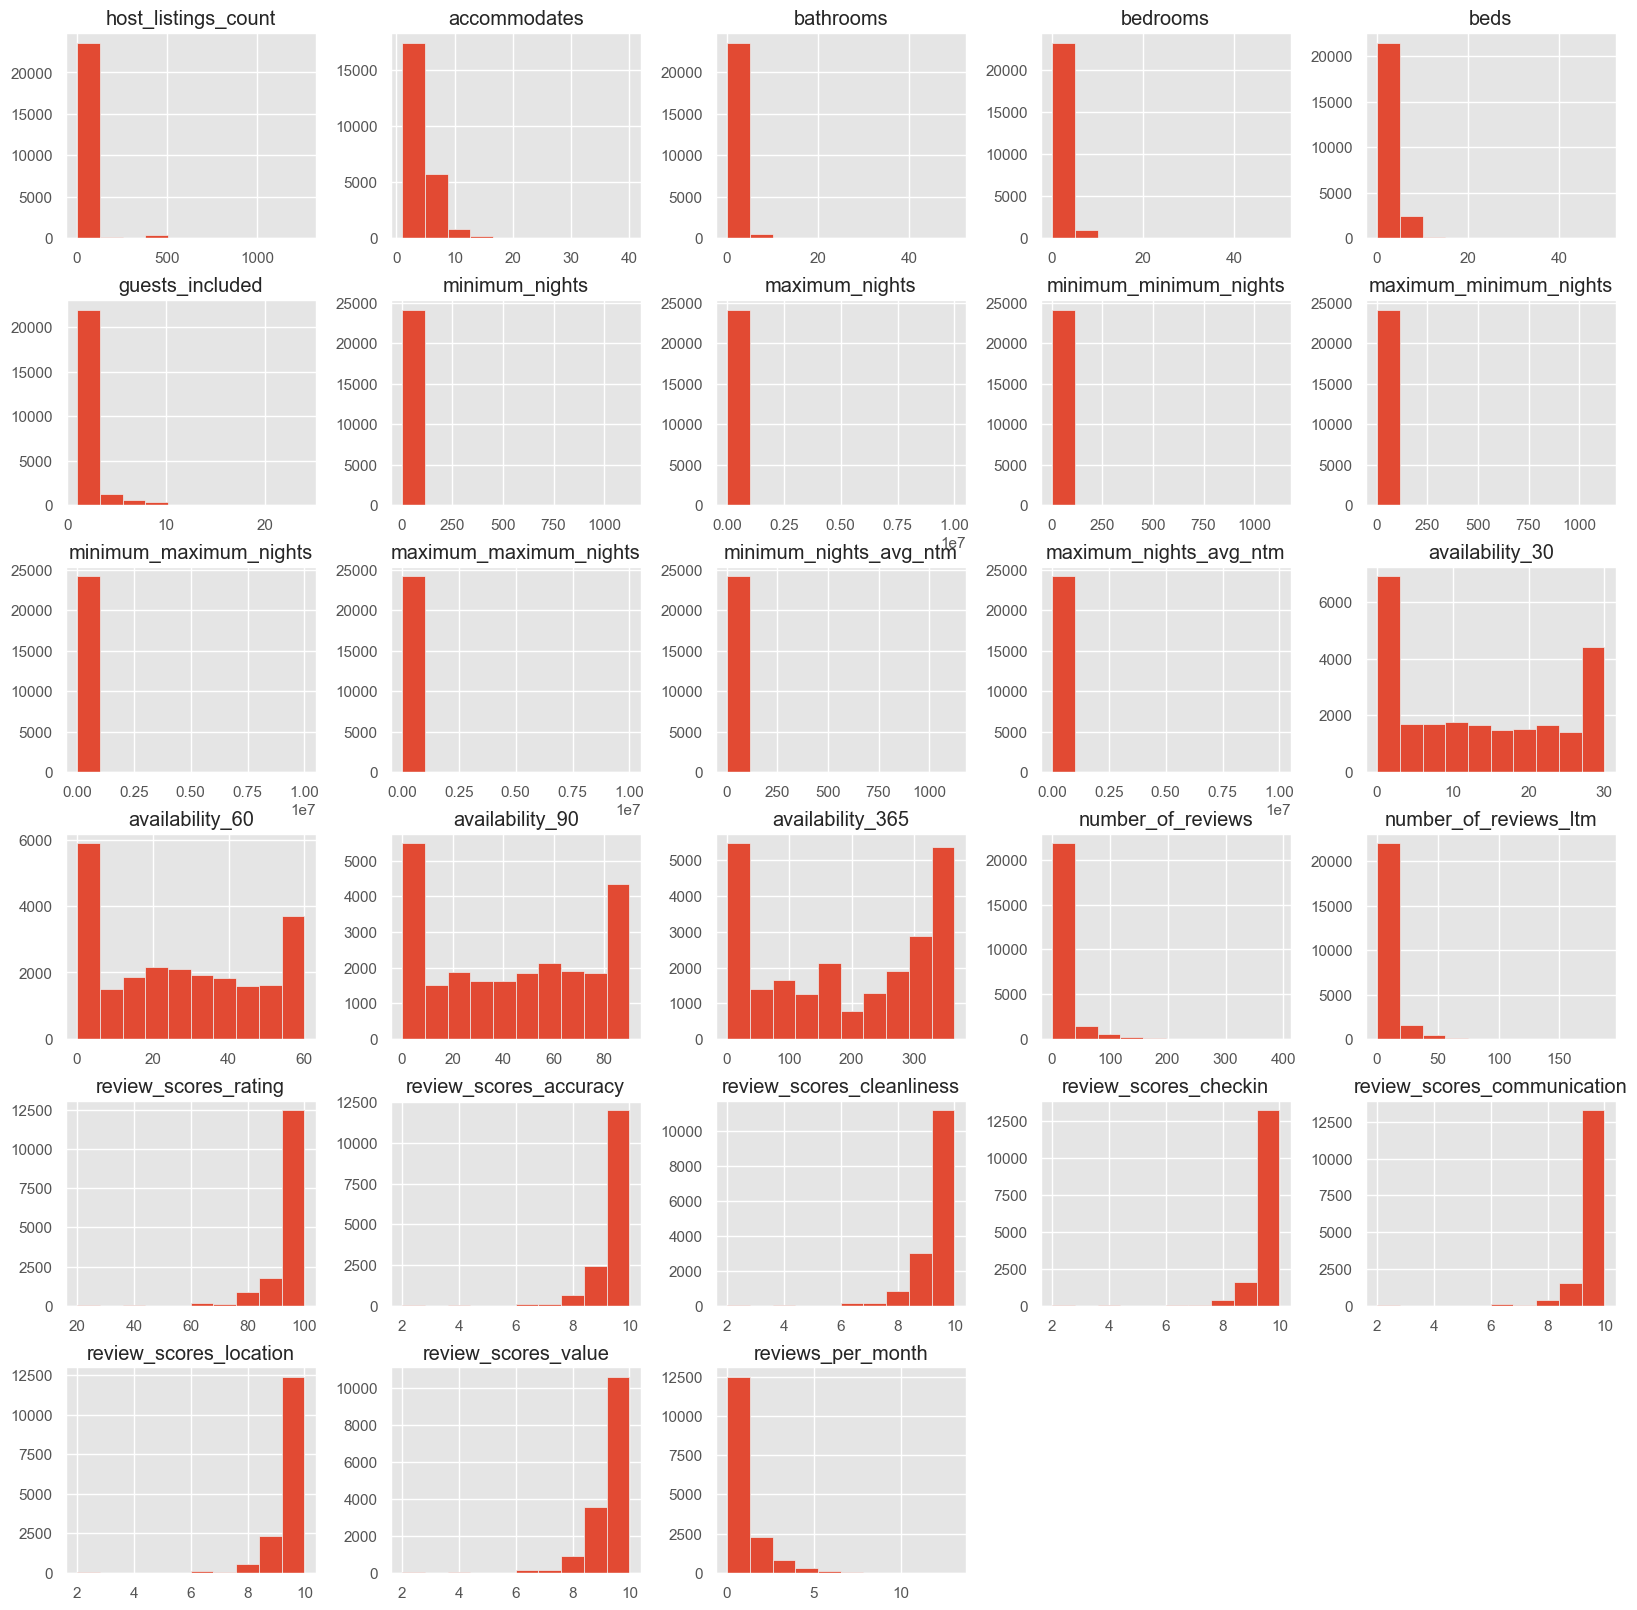

In [392]:
# Plotting the distribution of numerical and boolean categories
cape.hist(figsize=(20,20));

In [393]:
#Eliminated single category columns and jurisdiction names and square_feet which was missed earlier
cape.drop(['has_availability', 
           'host_has_profile_pic', 
           'is_business_travel_ready', 
           'require_guest_phone_verification', 
           'require_guest_profile_picture',
           'requires_license'], axis=1, inplace=True)

In [394]:
#dropping repetive information on maxium and minium nights 
cape.drop(['minimum_minimum_nights', 
           'maximum_minimum_nights', 
           'minimum_maximum_nights', 
           'maximum_maximum_nights', 
           'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

Description of each column:

* host_since - date that the host first joined Airbnb
* host_response_time - average amount of time the host takes to reply to messages
* host_response_rate - proportion of messages that the host replies to
* host_is_superhost - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb
* host_listings_count - how many listings the host has in total
* host_identity_verified - whether or not the host has been verified with id
* neighbourhood_cleansed - the London borough the property is in
* property_type - type of property, e.g. house or flat
* room_type - type of listing, e.g. entire home, private room or shared room
* accommodates - how many people the property accommodates
* bathrooms - number of bathrooms
* bedrooms - number of bedrooms
* beds - number of beds
* bed_type - type of bed, e.g. real bed or sofa-bed
* amenities - list of amenities
* price - nightly advertised price (the target variable)
* security_deposit - the amount required as a security deposit
* cleaning_fee - the amount of the cleaning fee (a fixed amount paid per booking)
* guests_included - the number of guests included in the booking fee
* extra_people - the price per additional guest above the guests_included price
* minimum_nights - the minimum length of stay
* maximum_nights - the maximum length of stay
* calendar_updated - when the host last updated the calendar
* availability_30 - how many nights are available to be booked in the next 30 days
* availability_60 - how many nights are available to be booked in the next 60 days
* availability_90 - how many nights are available to be booked in the next 90 days
* availability_365 - how many nights are available to be booked in the next 365 days
* number_of_reviews - the number of reviews left for the property
* number_of_reviews_ltm - the number of reviews left for the property in the last twelve months
* first_review - the date of the first review
* last_review - the date of the most recent review
* review_scores_rating - guests can score properties overall from 1 to 5 stars
* review_scores_accuracy - guests can score the accuracy of a property's description from 1 to 5 stars
* review_scores_cleanliness - guests can score a property's cleanliness from 1 to 5 stars
* review_scores_checkin - guests can score their check-in from 1 to 5 stars
* review_scores_communication - guests can score a host's communication from 1 to 5 stars
* review_scores_location - guests can score a property's location from 1 to 5 stars
* review_scores_value - guests can score a booking's value for money from 1 to 5 stars
* instant_bookable - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)
* cancellation_policy - the type of cancellation policy, e.g. strict or moderate
* reviews_per_month - calculated field of the average number of reviews left by guest each month

Cleaning Individual Columns(Univarete Analysis) 

 Host_since

Datetime column, will be converted into a measure of the number of days that host has been on the platfrom. 

In [395]:


# Converting to datetime
cape.host_since = pd.to_datetime(cape.host_since) 

# Calculating the number of days
# cape['host_days_active'] = (datetime(2019, 4, 9) - cape.host_since).astype('timedelta64[D]')
cape['host_days_active'] = (datetime(2019, 4, 9) - cape.host_since).dt.days


# Printing mean and median
print("Mean days as host:", round(cape['host_days_active'].mean(),0))
print("Median days as host:", cape['host_days_active'].median())

# Replacing null values with the median
cape.host_days_active.fillna(cape.host_days_active.median(), inplace=True)



Mean days as host: 1113.0
Median days as host: 1139.0


/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/3454755716.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cape.host_days_active.fillna(cape.host_days_active.median(), inplace=True)


host_response_time

In [396]:
cape.head()

host_since  host_response_time host_response_rate host_is_superhost  \
id                                                                          
3191  2008-10-21  within a few hours               100%                 t   
13044 2009-11-02                 NaN                NaN                 f   
15007 2009-12-01      within an hour               100%                 t   
15077 2009-12-02      within an hour               100%                 f   
15180 2009-12-03                 NaN                NaN                 f   

       host_listings_count host_identity_verified neighbourhood_cleansed  \
id                                                                         
3191                   1.0                      t                Ward 57   
13044                  5.0                      f               Ward 115   
15007                 12.0                      t                Ward 23   
15077                  5.0                      t                 Ward 4   
15180                  1.0                      f                Ward 83   

           property_type        room_type  accommodates  bathrooms  bedrooms  \
id                                                                             
3191          Guesthouse  Entire home/apt             2        1.0       1.0   
13044  Bed and breakfast       Hotel room             2        1.0       1.0   
15007              House  Entire home/apt             6        3.0       3.0   
15077          Apartment     Private room             2        1.5       1.0   
15180          Apartment  Entire home/apt             2        1.0       1.0   

       beds  bed_type                                          amenities  \
id                                                                         
3191    1.0  Real Bed  {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...   
13044   1.0  Real Bed  {TV,Wifi,"Air conditioning",Breakfast,"Free st...   
15007   4.0  Real Bed  {TV,"Cable TV",Internet,Wifi,"Wheelchair acces...   
15077   2.0  Real Bed  {Internet,Wifi,"Wheelchair accessible",Pool,Ki...   
15180   1.0  Real Bed  {TV,Kitchen,"Free parking on premises","Family...   

            price security_deposit cleaning_fee  guests_included extra_people  \
id                                                                              
3191     $692.00               NaN     $221.00                 2       $0.00    
13044  $2,101.00            $0.00        $0.00                 2       $0.00    
15007  $2,048.00        $2,500.00      $850.00                 6     $250.00    
15077  $1,385.00               NaN          NaN                2       $0.00    
15180    $560.00               NaN     $150.00                 2     $100.00    

       minimum_nights  maximum_nights calendar_updated  availability_30  \
id                                                                        
3191                3             730      2 weeks ago               23   
13044               3              30            today                0   
15007               2             120      2 weeks ago                5   
15077               5            1125     5 months ago               28   
15180               2             730    12 months ago               19   

       availability_60  availability_90  availability_365  number_of_reviews  \
id                                                                             
3191                44               64               339                 48   
13044                0                0                 0                  2   
15007                5                5                41                 27   
15077               53               83               358                  5   
15180               42               72               347                  0   

       number_of_reviews_ltm first_review last_review  review_scores_rating  \
id                                                                            
3191                      

In [397]:
print("Null values:", cape.host_response_time.isna().sum())
print(f"Proportion: {round((cape.host_response_time.isna().sum()/len(cape))*100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
len(cape[cape.loc[ :,['host_response_time', 'first_review'] ].isnull().sum(axis=1) == 2])

Null values: 6106
Proportion: 25.2%


3281

In [398]:
cape.host_response_time.fillna("unknown", inplace=True)
cape.host_response_time.value_counts(normalize=True)

/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/714757470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cape.host_response_time.fillna("unknown", inplace=True)


host_response_time
within an hour        0.447617
unknown               0.252345
within a few hours    0.144233
within a day          0.122371
a few days or more    0.033434
Name: proportion, dtype: float64

In [399]:
print("Null values:", cape.host_response_rate.isna().sum())
print(f"Proportion: {round((cape.host_response_rate.isna().sum()/len(cape))*100, 1)}%")

Null values: 6106
Proportion: 25.2%


In [400]:
# Removing the % sign from the host_response_rate string and converting to an integer
cape.host_response_rate = cape.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(cape['host_response_rate'].mean(),0))
print("Median host response rate:", cape['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((cape.host_response_rate == 100.0).sum()/cape.host_response_rate.count())*100,1)}%")

Mean host response rate: 93.0
Median host response rate: 100.0
Proportion of 100% host response rates: 77.4%


In [401]:
# Bin into four categories
cape.host_response_rate = pd.cut(cape.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
cape.host_response_rate = cape.host_response_rate.astype('str')

# Replace nulls with 'unknown'
cape.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
cape.host_response_rate.value_counts()

/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/877512614.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cape.host_response_rate.replace('nan', 'unknown', inplace=True)


host_response_rate
100%       14005
unknown     6106
50-89%      1894
0-49%       1135
90-99%      1057
Name: count, dtype: int64

host_is_superhost

In [402]:
list(cape.columns)

['host_since',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'reviews_per_month',
 'host_days_active']

In [403]:
# Number of rows without a value for multiple host-related columns
# len(cape[cape.loc[ :,['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 5])
len(cape[cape.loc[ :,['host_since', 'host_is_superhost', 'host_listings_count', 'host_identity_verified'] ].isnull().sum(axis=1) == 5])


0

columns that have a null for host realated columns will be dropped. iIn this case there is only 14 
(*q: take this out)

In [404]:
cape.dropna(subset=['host_since'], inplace=True)

property_type 

Putting the property_types into 3 categories. 

In [405]:
cape.property_type.value_counts()

property_type
Apartment                 9567
House                     7314
Guest suite               1464
Villa                     1022
Guesthouse                 909
Condominium                642
Bed and breakfast          630
Townhouse                  593
Serviced apartment         508
Cottage                    422
Loft                       322
Boutique hotel             146
Bungalow                   142
Other                      112
Hostel                      74
Chalet                      58
Farm stay                   51
Aparthotel                  33
Tiny house                  32
Hotel                       32
Cabin                       29
Earth house                 13
Nature lodge                12
Camper/RV                    7
Resort                       7
Boat                         6
Barn                         5
Tipi                         5
Hut                          4
Dorm                         4
Dome house                   3
Casa particular (Cuba)   

In [406]:
#This part was a bit subjective but wanted to classify the homes so I wouldnt have to deal with a huge amount of columns 
# *q: maybe see if its better to keep the diff types

cape.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/2802961201.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cape.property_type.replace({


In [407]:
#all the other homes will be looked as other 
cape.loc[~cape.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [408]:
cape['property_type']

id
3191            Other
13044           Other
15007           House
15077       Apartment
15180       Apartment
              ...    
40371247        House
40371249        Other
40371304        House
40373694    Apartment
40381558    Apartment
Name: property_type, Length: 24183, dtype: object

Bathroom,Beds,bedrooms 

In [409]:
# bathrooms                                         21
# bedrooms                                          18
# beds                                              68

#To deal with the few missing values when it comes beds, bathrooms, beds, missing values will be treated with median
#instead of mean which may give us a float number which in terms of this you cant have 1.45 bathrooms in a house 
# *q: maybe change this

for col in ['bathrooms', 'bedrooms', 'beds']:
    cape[col].fillna(cape[col].median(), inplace=True)

/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/3268386540.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cape[col].fillna(cape[col].median(), inplace=True)
/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/3268386540.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

Bed_type 

In [410]:
cape.bed_type.value_counts()

bed_type
Real Bed         24150
Pull-out Sofa       17
Futon                8
Airbed               4
Couch                4
Name: count, dtype: int64

In [411]:
#with the overwhelming amount of beds being a real bed it would be a useless indicator on predicting price. 
# *q: maybe disagree... maybe keep that in...

In [412]:
cape.drop('bed_type', axis=1, inplace=True)

Amenities 

In [413]:
# Example of amenities listed
cape.amenities[:1].values

array(['{TV,"Cable TV",Wifi,"Air conditioning",Kitchen,"Free parking on premises","Pets live on this property",Cat(s),"Other pet(s)","Buzzer/wireless intercom",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Private entrance","Hot water",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Single level home","BBQ grill","Patio or balcony","Garden or backyard","Luggage dropoff allowed","Long term stays allowed","Cleaning before checkout","Well-lit path to entrance","Host greets you"}'],
      dtype=object)

In [414]:
# Creating a set of all possible amenities
amenities_list = list(cape.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Alarm system',
 'Alfresco bathtub',
 'Alfresco shower',
 'Amazon Echo',
 'Apple TV',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bar',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach chairs',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Blender',
 'Body soap',
 'Breakfast',
 'Breakfast bar',
 'Breakfast table',
 'Brick oven',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Ceiling fans',
 'Ceiling hoist',
 'Central air conditioning',
 'Changing table',
 'Charcoal barbeque',
 "Chef's kitchen",
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Computer',
 'Convection oven',
 'Cooking basics',
 'Courtyard',
 'Crib',
 'DVD playe



In the list above, some amenities are more important than others (e.g. a balcony is more likely to increase price than a fax machine), and some are likely to be fairly uncommon (e.g. 'Electric profiling bed'). Based on previous experience working in the Airbnb property management industry, and research into which amenities are considered by guests to be more important, a selection of the more important amenities will be extracted. These will be further investigated in the EDA section. For example, if it turns out that almost all properties have/do not have a particular amenity, that feature will not be very useful in helping explain differences in prices.

The amenities chosen are (slashes indicate separate categories that can be combined):

    24-hour check-in
    Air conditioning/central air conditioning
    Amazon Echo/Apple TV/DVD player/game console/Netflix/projector and screen/smart TV (i.e. non-basic electronics)
    BBQ grill/fire pit/propane barbeque
    Balcony/patio or balcony
    Beach view/beachfront/lake access/mountain view/ski-in ski-out/waterfront (i.e. great location/views)
    Bed linens
    Breakfast
    Cable TV/TV
    Coffee maker/espresso machine
    Cooking basics
    Dishwasher/Dryer/Washer/Washer and dryer
    Elevator
    Exercise equipment/gym/private gym/shared gym
    Family/kid friendly, or anything containing 'children'
    Free parking on premises/free street parking/outdoor parking/paid parking off premises/paid parking on premises
    Garden or backyard/outdoor seating/sun loungers/terrace
    Host greets you
    Hot tub/jetted tub/private hot tub/sauna/shared hot tub/pool/private pool/shared pool
    Internet/pocket wifi/wifi
    Long term stays allowed
    Pets allowed/cat(s)/dog(s)/pets live on this property/other pet(s)
    Private entrance
    Safe/security system
    Self check-in
    Smoking allowed
    Step-free access/wheelchair accessible, or anything containing 'accessible'
    Suitable for events



In [415]:
cape.loc[cape['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
cape.loc[cape['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
cape.loc[cape['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
cape.loc[cape['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
cape.loc[cape['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
cape.loc[cape['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
cape.loc[cape['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
cape.loc[cape['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
cape.loc[cape['amenities'].str.contains('TV'), 'tv'] = 1
cape.loc[cape['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
cape.loc[cape['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
cape.loc[cape['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
cape.loc[cape['amenities'].str.contains('Elevator'), 'elevator'] = 1
cape.loc[cape['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
cape.loc[cape['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
cape.loc[cape['amenities'].str.contains('parking'), 'parking'] = 1
cape.loc[cape['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
cape.loc[cape['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
cape.loc[cape['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
cape.loc[cape['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
cape.loc[cape['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
cape.loc[cape['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
cape.loc[cape['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
cape.loc[cape['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
cape.loc[cape['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
cape.loc[cape['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
cape.loc[cape['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
cape.loc[cape['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/3581347122.py:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cape.loc[cape['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1


In [416]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = cape.iloc[:,41:].columns
cape[cols_to_replace_nulls] = cape[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in cape.iloc[:,41:].columns:
    if cape[col].sum() < len(cape)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
cape.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
cape.drop('amenities', axis=1, inplace=True)

['check_in_24h', 'high_end_electronics', 'gym', 'event_suitable']


In [417]:
cape.columns[40:]

Index(['air_conditioning', 'bbq', 'balcony', 'nature_and_views', 'bed_linen',
       'breakfast', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods',
       'elevator', 'child_friendly', 'parking', 'outdoor_space',
       'host_greeting', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays',
       'pets_allowed', 'private_entrance', 'secure', 'self_check_in',
       'smoking_allowed', 'accessible'],
      dtype='object')

Price 

In [418]:
cape['price'].str.replace('[$,]','')

id
3191           $692.00 
13044        $2,101.00 
15007        $2,048.00 
15077        $1,385.00 
15180          $560.00 
               ...     
40371247       $545.00 
40371249       $545.00 
40371304    $18,000.00 
40373694       $795.00 
40381558     $2,106.00 
Name: price, Length: 24183, dtype: object

In [419]:
#removing the $ sign and converting price to float 
cape['price'] = cape['price'].str.replace(',','')

cape['price'] = pd.to_numeric(cape['price'].str.replace('$',''))


#Converting rand to USD with current exchange rate 
cape['price']= cape['price'] *.069

In [420]:
cape['price']

id
3191          47.748
13044        144.969
15007        141.312
15077         95.565
15180         38.640
              ...   
40371247      37.605
40371249      37.605
40371304    1242.000
40373694      54.855
40381558     145.314
Name: price, Length: 24183, dtype: float64

In [421]:
#Rounding the nearest dollar amount because airbnb prices are often listed without decimal points. 
cape.price.round()

id
3191          48.0
13044        145.0
15007        141.0
15077         96.0
15180         39.0
             ...  
40371247      38.0
40371249      38.0
40371304    1242.0
40373694      55.0
40381558     145.0
Name: price, Length: 24183, dtype: float64

In [422]:
#converting price to datatype of float since they have all been rounded 
cape['price'] = cape.price.astype(int)

security_deposit 

In [423]:
# cape['security_deposit'] = pd.to_numeric(cape['security_deposit'].str.replace('[$,]',''))
cape['security_deposit'] = cape['security_deposit'].str.replace(',','')
cape['security_deposit'] = pd.to_numeric(cape['security_deposit'].str.replace('$',''))

In [424]:
#Converting rand to USD with current exchange rate 
cape['security_deposit']= cape['security_deposit'] *.069

In [425]:
#Rounding the nearest dollar amount because airbnb prices are often listed without decimal points. 
cape.security_deposit.round()

id
3191           NaN
13044          0.0
15007        173.0
15077          NaN
15180          NaN
             ...  
40371247       NaN
40371249       NaN
40371304    2070.0
40373694     276.0
40381558     345.0
Name: security_deposit, Length: 24183, dtype: float64

In [426]:
#Nan are convert to 0 because to the best of our knowledge they are not charging anything 
cape.security_deposit.fillna(0, inplace=True)

/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/2522963762.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cape.security_deposit.fillna(0, inplace=True)


In [427]:
#converting price to datatype of float since they have all been rounded 
cape['security_deposit'] = cape.security_deposit.astype(int)

Cleaning_fee

In [428]:
cape['cleaning_fee'] = cape['cleaning_fee'].str.replace(',','')
cape['cleaning_fee'] = pd.to_numeric(cape['cleaning_fee'].str.replace('$',''))

In [429]:
cape['cleaning_fee'] = cape['cleaning_fee'] *.069

In [430]:
cape['cleaning_fee'] 

id
3191        15.249
13044        0.000
15007       58.650
15077          NaN
15180       10.350
             ...  
40371247       NaN
40371249       NaN
40371304     0.000
40373694    24.150
40381558     0.000
Name: cleaning_fee, Length: 24183, dtype: float64

In [431]:
#Rounding the nearest dollar amount because airbnb prices are often listed without decimal points. 
cape.cleaning_fee.round()

id
3191        15.0
13044        0.0
15007       59.0
15077        NaN
15180       10.0
            ... 
40371247     NaN
40371249     NaN
40371304     0.0
40373694    24.0
40381558     0.0
Name: cleaning_fee, Length: 24183, dtype: float64

In [432]:
#Nan are convert to 0 because to the best of our knowledge they are not charging anything 
cape.cleaning_fee.fillna(0, inplace=True)
#converting price to datatype of float since they have all been rounded 
cape['cleaning_fee'] = cape.cleaning_fee.astype(int)

extra_people 

In [433]:
cape['extra_people'] = cape['extra_people'].str.replace(',','')

In [434]:
cape['extra_people'] = pd.to_numeric(cape['extra_people'].str.replace('$',''))
cape['extra_people'] = cape['extra_people'] *.069
#Rounding the nearest dollar amount because airbnb prices are often listed without decimal points. 
cape.extra_people.round()
#Nan are convert to 0 because to the best of our knowledge they are not charging anything 
cape.extra_people.fillna(0, inplace=True)
#converting price to datatype of float since they have all been rounded 
cape['extra_people'] = cape.extra_people.astype(int)

# *q: take this out maybe... because it takes out the extra ppl fees. maybe take out the rounding, since maybe in another currency the cents make a big diff to those ppl

/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/1990512994.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cape.extra_people.fillna(0, inplace=True)


In [435]:
cape['extra_people']

id
3191         0
13044        0
15007       17
15077        0
15180        6
            ..
40371247     0
40371249     0
40371304     0
40373694     0
40381558     0
Name: extra_people, Length: 24183, dtype: int64

Calendar_updated

In [436]:
cape.calendar_updated.head(10)

id
3191       2 weeks ago
13044            today
15007      2 weeks ago
15077     5 months ago
15180    12 months ago
15199    30 months ago
15285       4 days ago
15331     9 months ago
15348            never
15354     9 months ago
Name: calendar_updated, dtype: object

In [437]:
cape.calendar_updated.nunique()

76

In [438]:
cape.calendar_updated.value_counts()

calendar_updated
today            3755
3 months ago     1893
2 weeks ago      1848
a week ago       1689
2 months ago     1282
3 weeks ago      1277
4 weeks ago       958
yesterday         944
5 weeks ago       736
4 months ago      611
6 weeks ago       572
5 days ago        520
4 days ago        469
5 months ago      408
3 days ago        407
11 months ago     382
9 months ago      370
2 days ago        369
8 months ago      357
7 weeks ago       327
10 months ago     314
12 months ago     301
7 months ago      300
24 months ago     292
6 months ago      271
13 months ago     245
23 months ago     193
14 months ago     178
6 days ago        173
25 months ago     142
20 months ago     136
1 week ago        130
22 months ago     125
36 months ago     124
35 months ago     105
26 months ago     103
15 months ago     101
21 months ago      99
17 months ago      98
48 months ago      97
19 months ago      89
16 months ago      89
37 months ago      82
32 months ago      71
47 months ago  

There doesnt seem to be anything valuable that can be gained from this column so im going to just drop it. 

In [439]:
cape.drop('calendar_updated', axis=1, inplace=True)
# *q: maybe dont do this?

Availability

New law passed in South Africa that only allows 30 day concsecutive rentals so the other availbilities dont matter. 

In [440]:
cape.drop(['availability_60', 'availability_90', 'availability_365'], axis=1, inplace=True)
# *q: when doing another city where this is legal, then dont drop this column

first_review and last_review

In [441]:

# cape.first_review.isna().sum()/len(cape)

# cape.review_scores_rating .isna().sum()/len(cape)

In [442]:
cape.first_review.isna().sum()/len(cape)

0.3385849563743125

In [443]:
cape.review_scores_rating.isna().sum()/len(cape)

0.35888847537526364

In [444]:
cape.first_review = pd.to_datetime(cape.first_review) # Converting to datetime


In [445]:
# Calculating the number of days between the first review and the date the data was scraped
# cape['time_since_first_review'] = (datetime(2019, 11, 27) - cape.first_review).astype('timedelta64[D]')
cape['time_since_first_review'] = (datetime(2019, 11, 27) - cape.first_review).dt.days


In [446]:
cape['time_since_first_review']

id
3191        2371.0
13044       2956.0
15007       2173.0
15077       2516.0
15180          NaN
             ...  
40371247       NaN
40371249       NaN
40371304       NaN
40373694       NaN
40381558       NaN
Name: time_since_first_review, Length: 24183, dtype: float64

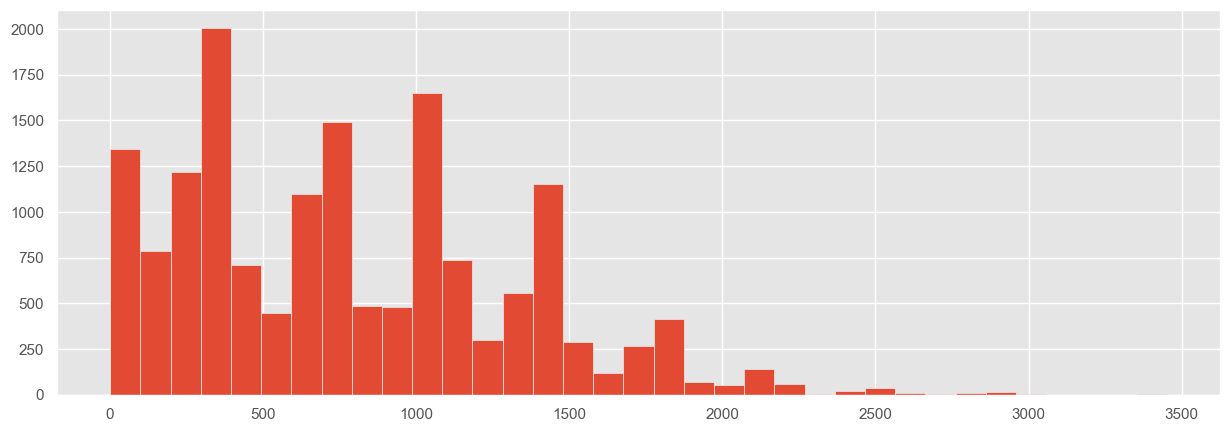

In [447]:
# Distribution of the number of days since first review
cape.time_since_first_review.hist(figsize=(15,5), bins=35);

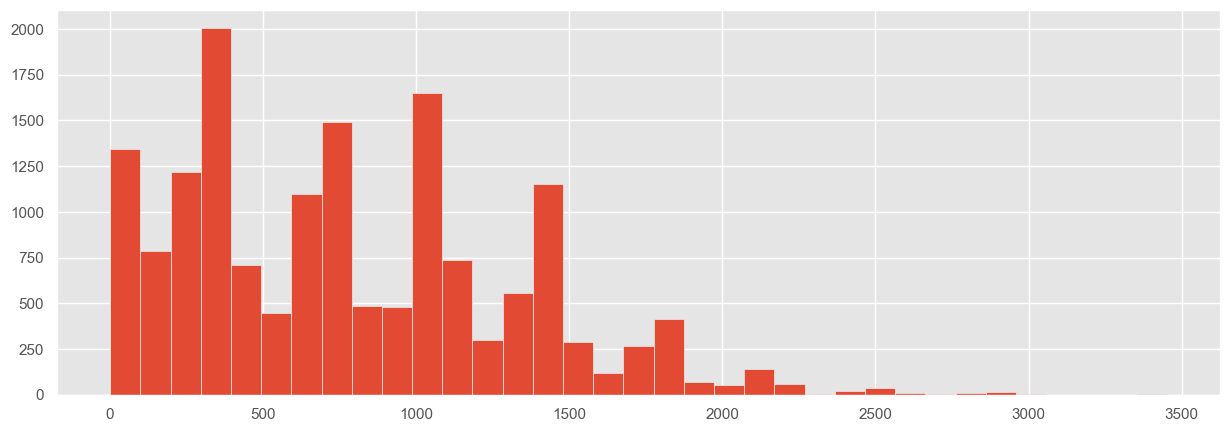

In [448]:
# Distribution of the number of days since first review
cape.time_since_first_review.hist(figsize=(15,5), bins=35);

In [449]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    cape[col] = pd.cut(cape[col], bins=bins, labels=labels, include_lowest=True)
    cape[col] = cape[col].astype('str')
    cape[col].fillna(na_label, inplace=True)

In [450]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(cape.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/4135795938.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cape[col].fillna(na_label, inplace=True)


Last_Review will also go through same process 

In [451]:
cape.last_review = pd.to_datetime(cape.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
cape['time_since_last_review'] = (datetime(2019, 4, 9) - cape.last_review).dt.days

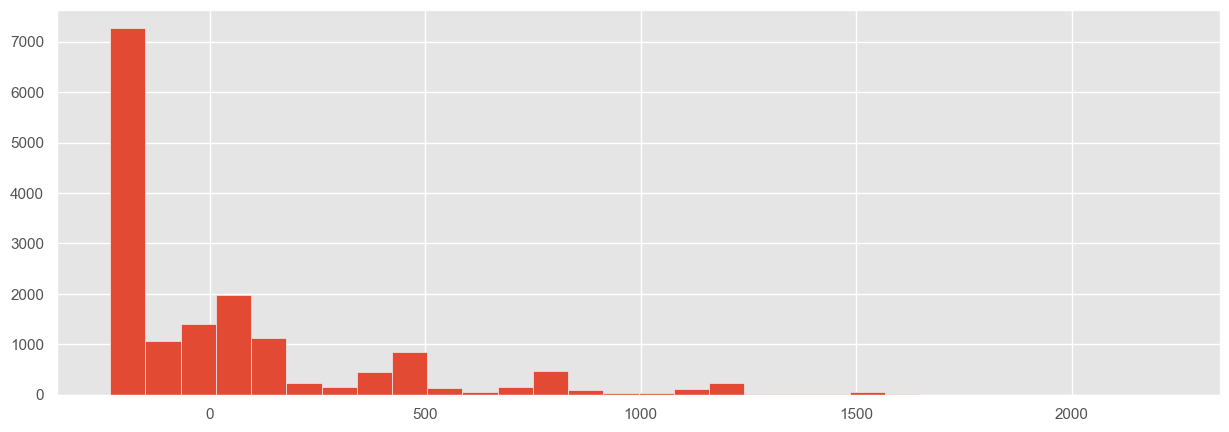

In [452]:
# Distribution of the number of days since last review
cape.time_since_last_review.hist(figsize=(15,5), bins=30);

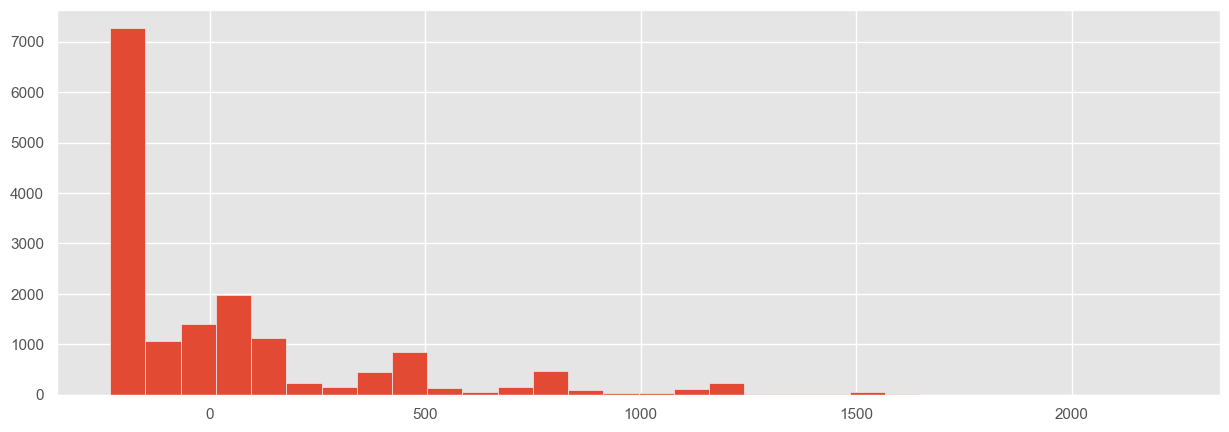

In [453]:
# Distribution of the number of days since last review
cape.time_since_last_review.hist(figsize=(15,5), bins=30);

In [454]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(cape.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/4135795938.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cape[col].fillna(na_label, inplace=True)


review ratings columns

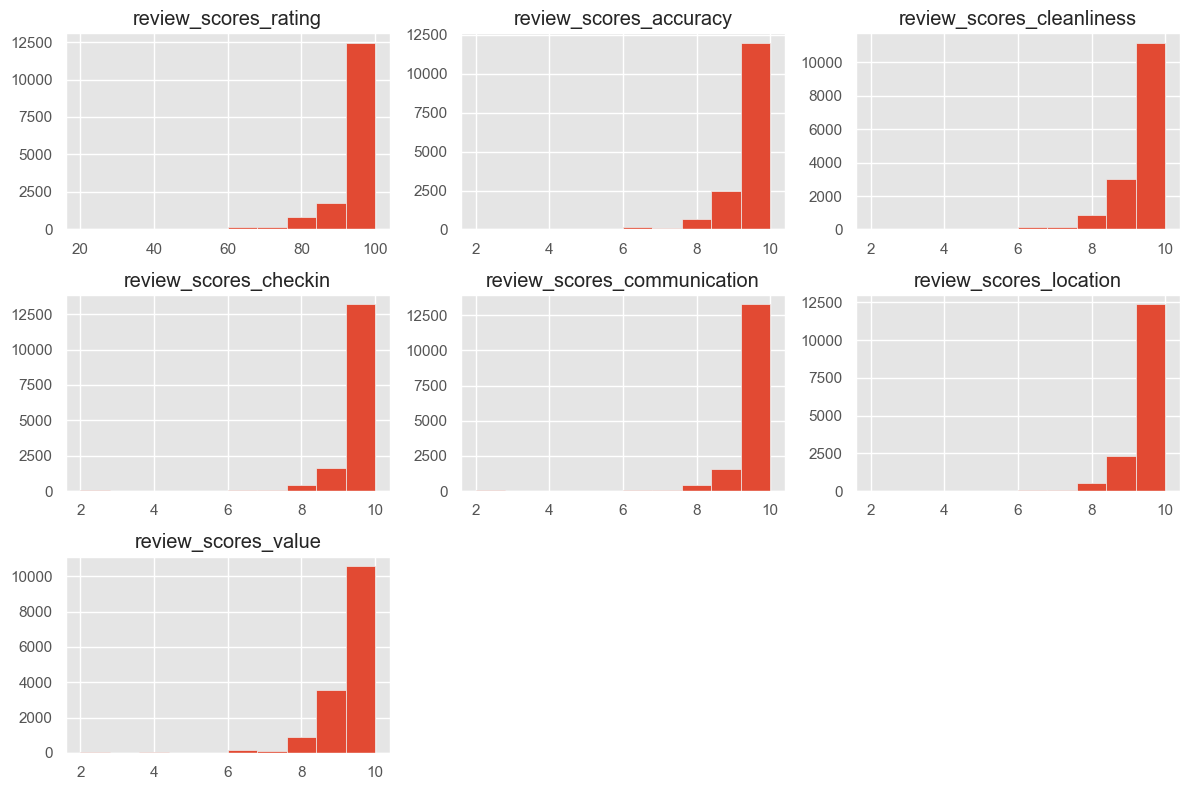

In [455]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(cape.columns[cape.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    cape[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

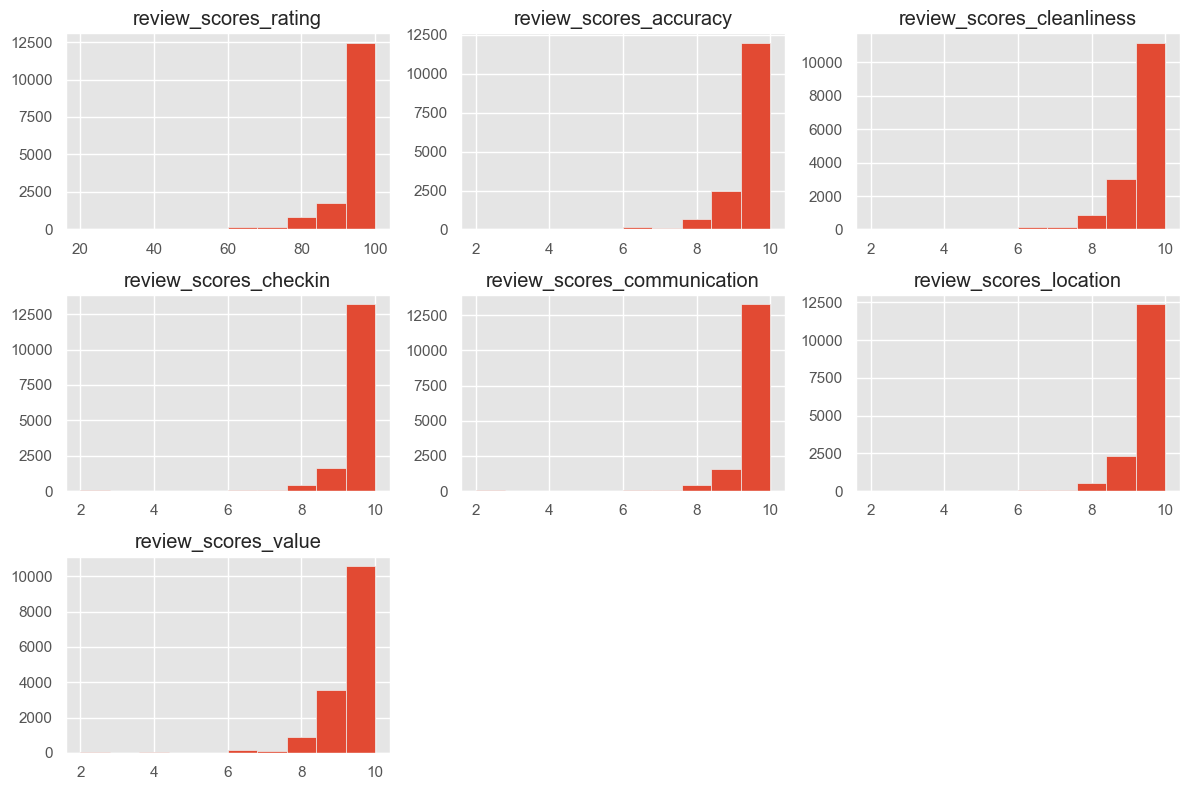

In [456]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(cape.columns[cape.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    cape[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [457]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)

# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

    # Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/4135795938.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cape[col].fillna(na_label, inplace=True)
/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/4135795938.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

cancellation_policy

In [458]:
cape.cancellation_policy.value_counts()

cancellation_policy
strict_14_with_grace_period    10433
flexible                        7555
moderate                        5508
super_strict_30                  538
super_strict_60                   89
luxury_moderate                   50
luxury_super_strict_95             7
strict                             3
Name: count, dtype: int64

In [459]:
# Replacing categories
cape.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate',
    'luxury_super_strict_95': 'strict_14_with_grace_period'
    }, inplace=True)

/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/2362679654.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cape.cancellation_policy.replace({


number_of_reviews_ltm and reviews_per_month

In [460]:
cape['number_of_reviews_ltm']

id
3191        7
13044       0
15007       3
15077       0
15180       0
           ..
40371247    0
40371249    0
40371304    0
40373694    0
40381558    0
Name: number_of_reviews_ltm, Length: 24183, dtype: int64

In [461]:
cape.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)
# *q: I guess the reason it makes sense to drop these things is because a newcomer would not have these at all so the prediction would be unfair if based on that...

In [462]:
cape.head()
cape.dtypes

host_since                     datetime64[ns]
host_response_time                     object
host_response_rate                     object
host_is_superhost                      object
host_listings_count                   float64
host_identity_verified                 object
neighbourhood_cleansed                 object
property_type                          object
room_type                              object
accommodates                            int64
bathrooms                             float64
bedrooms                              float64
beds                                  float64
price                                   int64
security_deposit                        int64
cleaning_fee                            int64
guests_included                         int64
extra_people                            int64
minimum_nights                          int64
maximum_nights                          int64
availability_30                         int64
number_of_reviews                 

# Exploratory data analysis


## Time Series

Question: how long have hosts been listing properties on Airbnb in Capetown?

A: The oldest listing is August 2008, and they really gained traction in the market in 2013. 

In [463]:
print(f"Of the Airbnb hosts that are still listing on the site, the first joined on {min(cape.host_since).strftime('%d %B %Y')}, and the most recent joined on {max(cape.host_since).strftime('%d %B %Y')}.")

Of the Airbnb hosts that are still listing on the site, the first joined on 11 August 2008, and the most recent joined on 25 November 2019.


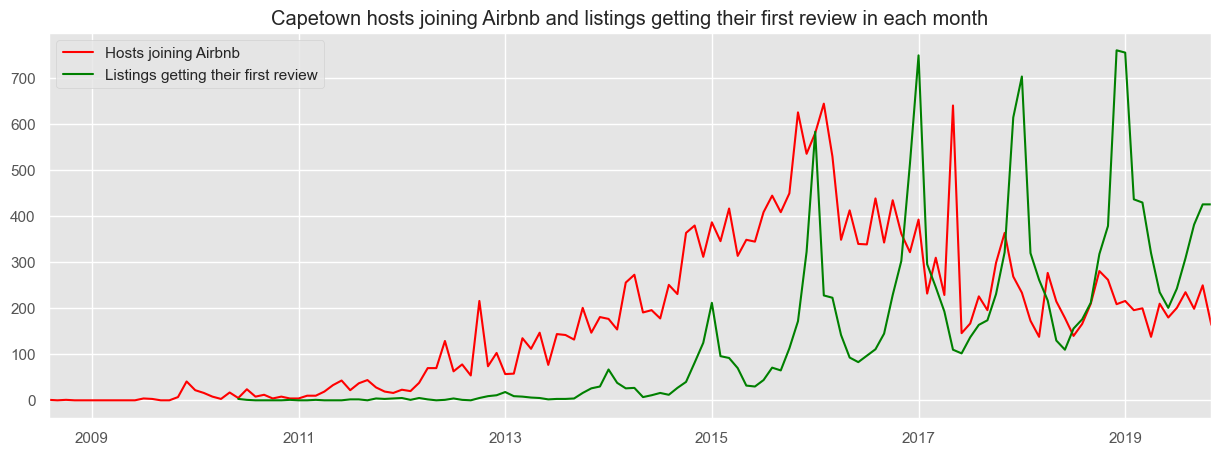

In [464]:
plt.figure(figsize=(15,5))
cape.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='red')
cape.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')
plt.title('Capetown hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2008-08-01', '2019-11-25') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

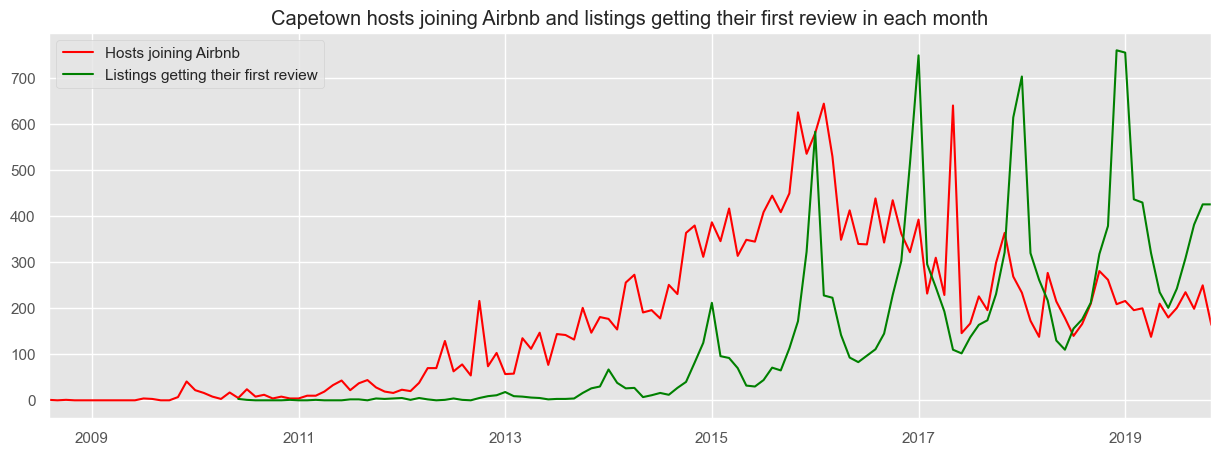

In [465]:
plt.figure(figsize=(15,5))
cape.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='red')
cape.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')
plt.title('Capetown hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2008-08-01', '2019-11-25') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

In [466]:
min(cape.host_since)

Timestamp('2008-08-11 00:00:00')

In [467]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(cape.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(cape.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [468]:
def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

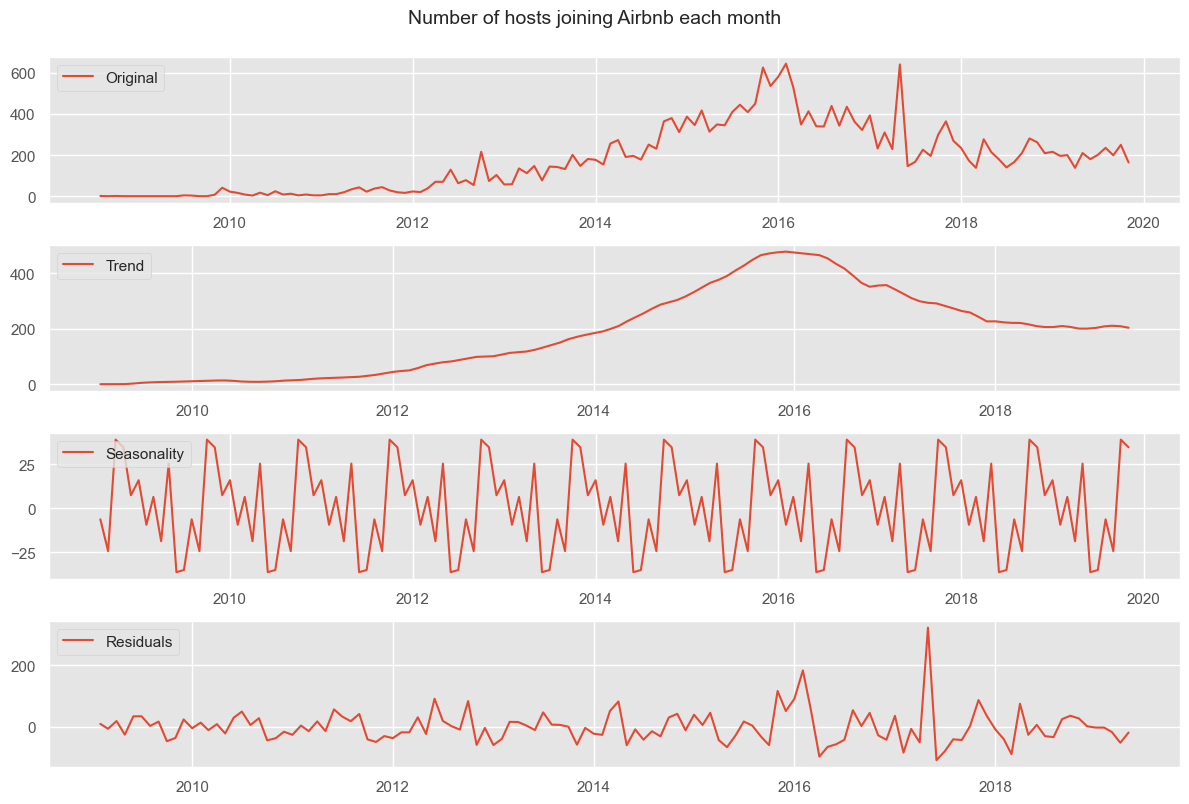

In [469]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

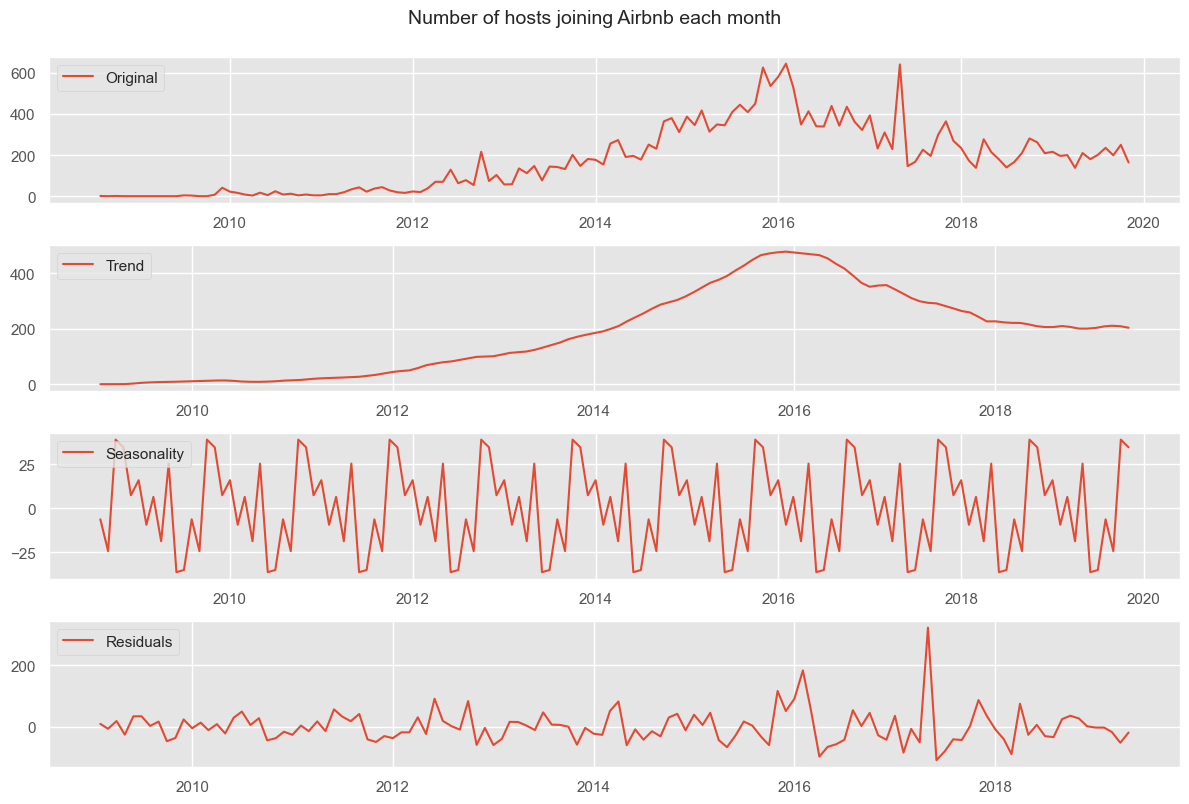

In [470]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

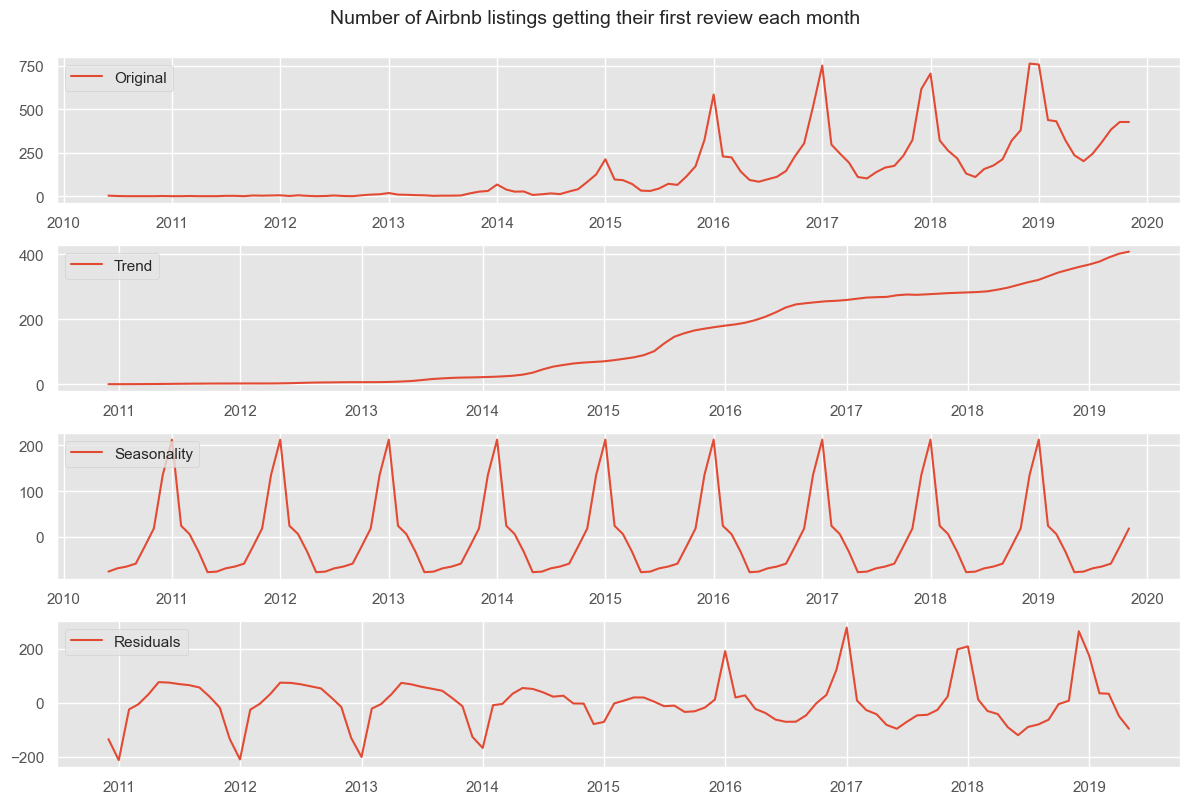

In [471]:
decompose_time_series(ts_first_review, title='Number of Airbnb listings getting their first review each month')

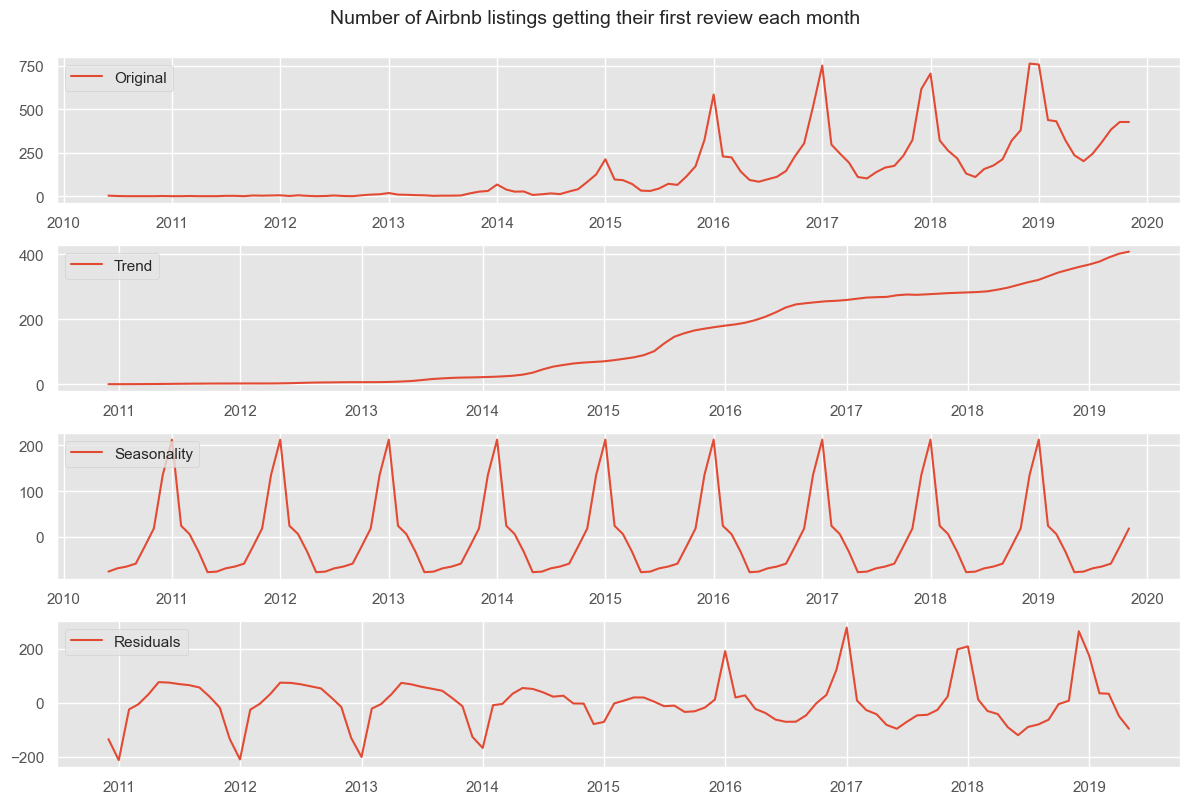

In [472]:
decompose_time_series(ts_first_review, title='Number of Airbnb listings getting their first review each month')

Question: how have prices changed over time?

Answer: the average price per night for Airbnb listings in Cape Town has increased slightly over the last 10 years. Even though the average price has take a hit since 2015 when it was $140.83, whereas the mean price in 2019 was $116.14.


/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


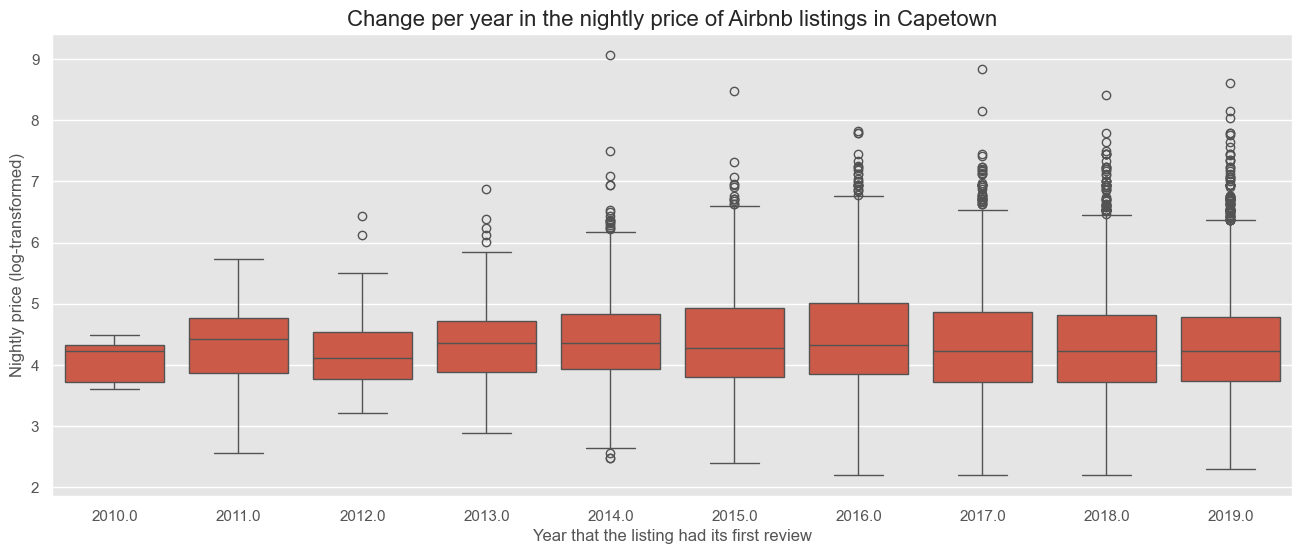

In [473]:
plt.figure(figsize=(16,6))
sns.boxplot(x=cape.first_review.dt.year, y=np.log(cape.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in Capetown', fontsize=16)
plt.show()

In [474]:
print("Mean nightly price of listings in each year on Airbnb in Cape Town:")
print(round(cape.set_index('first_review').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb in Cape Town:
first_review
2010-01-01     62.40
2011-01-01     95.62
2012-01-01     97.75
2013-01-01    107.64
2014-01-01    140.83
2015-01-01    119.66
2016-01-01    131.76
2017-01-01    119.03
2018-01-01    116.04
2019-01-01    116.86
Name: price, dtype: float64


In [475]:
# Dropping host_since and first_review as they are no longer needed
cape.drop(['host_since', 'first_review','last_review'], axis=1, inplace=True, errors='ignore')

## Numerical Features 

In [476]:
cape.describe()

host_listings_count  accommodates     bathrooms      bedrooms  \
count         24183.000000  24183.000000  24183.000000  24183.000000   
mean             14.508829      3.905636      1.739280      1.883927   
std              57.395632      2.426614      1.202213      1.421697   
min               0.000000      1.000000      0.000000      0.000000   
25%               1.000000      2.000000      1.000000      1.000000   
50%               2.000000      4.000000      1.000000      2.000000   
75%               5.000000      5.000000      2.000000      3.000000   
max            1260.000000     40.000000     50.000000     50.000000   

               beds         price  security_deposit  cleaning_fee  \
count  24183.000000  24183.000000      24183.000000  24183.000000   
mean       2.409254    164.391308        116.423148     15.041351   
std        1.935254    476.311115        348.584679     28.235476   
min        0.000000      0.000000          0.000000      0.000000   
25%        1.000000     45.000000          0.000000      0.000000   
50%        2.000000     76.000000          0.000000     10.000000   
75%        3.000000    138.000000        111.000000     24.000000   
max       50.000000  20699.000000      17250.000000   2760.000000   

       guests_included  extra_people  minimum_nights  maximum_nights  \
count     24183.000000  24183.000000    24183.000000    2.418300e+04   
mean          1.603647      5.433817        3.817558    1.119451e+03   
std           1.426673     14.367689       13.721543    6.430578e+04   
min           1.000000      0.000000        1.000000    1.000000e+00   
25%           1.000000      0.000000        1.000000    4.000000e+01   
50%           1.000000      0.000000        2.000000    1.125000e+03   
75%           2.000000      6.000000        3.000000    1.125000e+03   
max          24.000000    306.000000     1125.000000    1.000000e+07   

       availability_30  number_of_reviews  host_days_active  air_conditioning  \
count     24183.000000       24183.000000      24183.000000      24183.000000   
mean         12.888930          12.769383       1112.555307          0.283877   
std          10.951921          27.146803        705.430821          0.450887   
min           0.000000           0.000000       -230.000000          0.000000   
25%           1.000000           0.000000        618.000000          0.000000   
50%          12.000000           2.000000       1139.000000          0.000000   
75%          23.000000          12.000000       1548.000000          1.000000   
max          30.000000         393.000000       3893.000000          1.000000   

                bbq       balcony  nature_and_views     bed_linen  \
count  24183.000000  24183.000000      24183.000000  24183.000000   
mean       0.225613      0.338047          0.129926      0.417607   
std        0.417994      0.473055          0.336229      0.493175   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.000000          0.000000      0.000000   
50%        0.000000      0.000000          0.000000      0.000000   
75%        0.000000      1.000000          0.000000      1.000000   
max        1.000000      1.000000          1.000000      1.000000   

          breakfast            tv  coffee_machine  cooking_basics  \
count  24183.000000  24183.000000    24183.000000    24183.000000   
mean       0.116073      0.842741        0.273002        0.409420   
std        0.320319      0.364053        0.445511        0.491737   
min        0.000000      0.000000        0.000000        0.000000   
25%        0.000000      1.000000        0.000000        0.000000   
50%        0.000000      1.000000        0.000000        0.000000   
75%        0.000000      1.000000        1.000000        1.000000   
max        1.000000      1.000000        1.000000        1.000000   

        white_goods      elevator  child_friendly       parking  \
count  24183.000000  24183.000000    24183.000

Question: what is the overall distribution of prices?

Answer: nightly advertised prices range from $0 to $20,699. The extreme ends of the range are due to hosts not understanding how to use Airbnb advertised prices (sometimes called 'sticker' prices) correctly. The advertised prices can be set to any arbitrary amount, and these are the prices that show when dates are not entered on the site.

A model is only as good as its data, and unfortunately this model will be predicting advertised prices rather than the prices actually paid. Nevertheless, some cleaning of the particularly unhelpful values will be done. Very small values under $10 will be increased to $10.

There are notable drop-offs in nightly prices at $200 (first graph, orange line), $500 (second graph, orange line) and $1,000 (second graph, red line). Values above $1,000 will be reduced to $1,000.
    

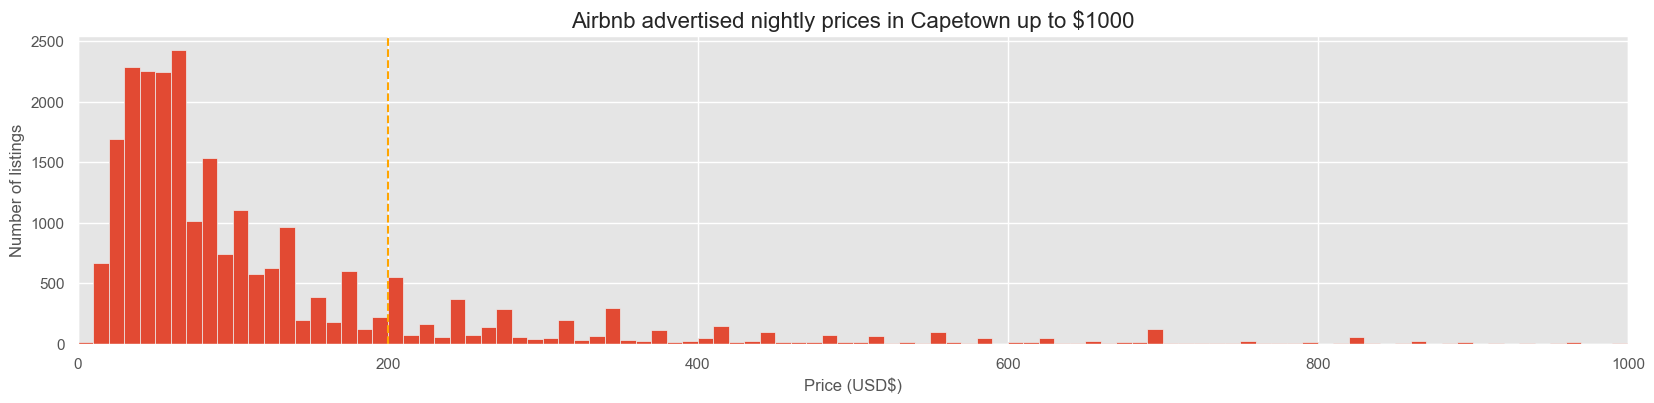

In [477]:
# Distribution of prices from $0 to $1000
plt.figure(figsize=(20,4))
cape.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in Capetown up to $1000", fontsize=16)
plt.xlabel("Price (USD$)")
plt.ylabel("Number of listings")
plt.show()

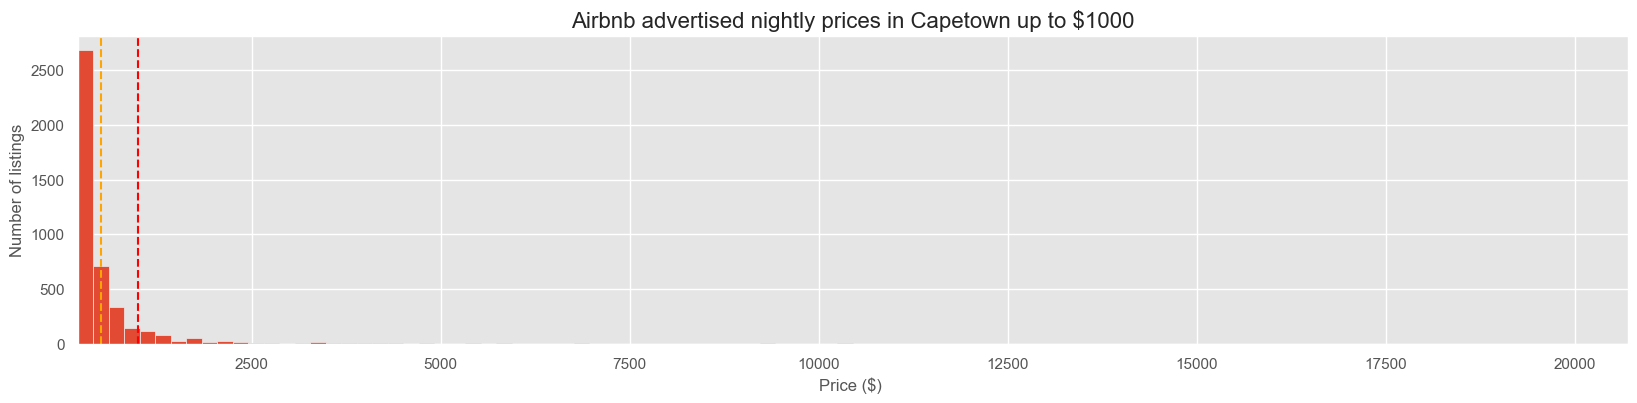

In [478]:
# Distribution of prices from $200 upwards
plt.figure(figsize=(20,4))
cape.price.hist(bins=100, range=(200, max(cape.price)))
plt.margins(x=0)
plt.axvline(500, color='orange', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices in Capetown up to $1000", fontsize=16)
plt.xlabel("Price ($) ")
plt.ylabel("Number of listings")
plt.show()

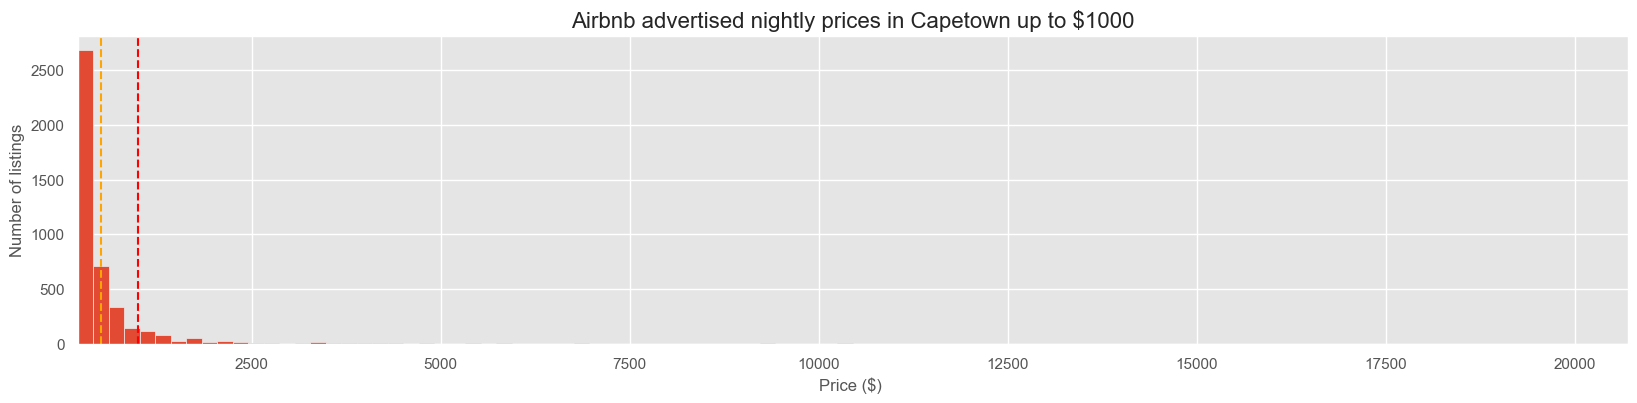

In [479]:
# Distribution of prices from $200 upwards
plt.figure(figsize=(20,4))
cape.price.hist(bins=100, range=(200, max(cape.price)))
plt.margins(x=0)
plt.axvline(500, color='orange', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices in Capetown up to $1000", fontsize=16)
plt.xlabel("Price ($) ")
plt.ylabel("Number of listings")
plt.show()

In [480]:
# Replacing values under $10 with $10
cape.loc[cape.price <= 10, 'price'] = 10

# Replacing values over $1000 with $1000
cape.loc[cape.price >= 1000, 'price'] = 1000



Host listings count


In [481]:
print("Median number of listings per host:", int(cape.host_listings_count.median()))
print("Mean number of listings per host:", int(round(cape.host_listings_count.mean())))
print(f"{int(round(100*len(cape[cape.host_listings_count == 1])/len(cape)))}% of listings are from hosts with one listing.")

Median number of listings per host: 2
Mean number of listings per host: 15
41% of listings are from hosts with one listing.


Number of people accommodated, bathrooms, bedrooms and beds

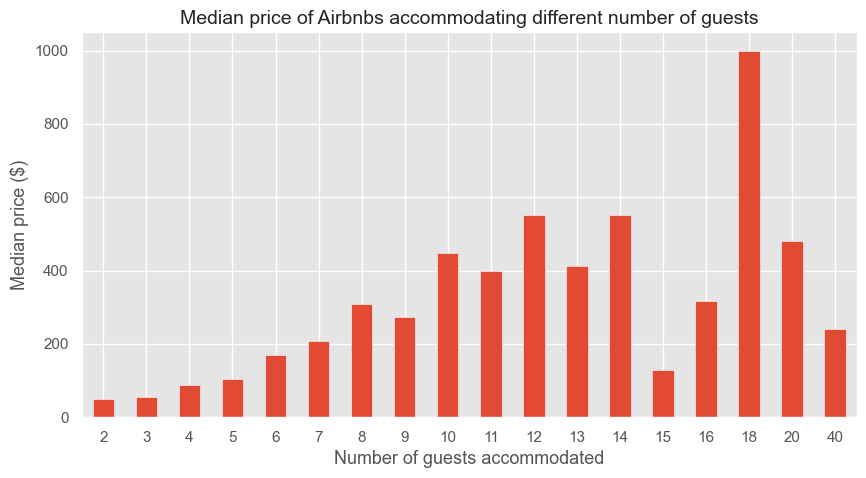

In [482]:
plt.figure(figsize=(10,5))
cape.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

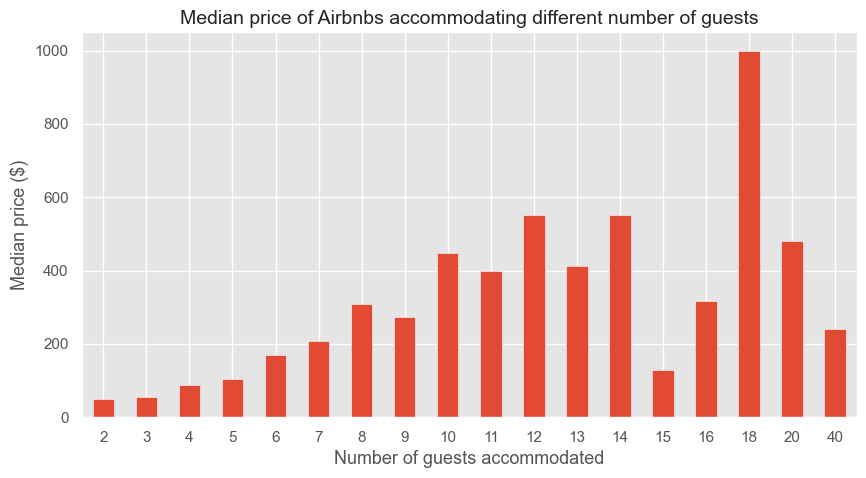

In [483]:
plt.figure(figsize=(10,5))
cape.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

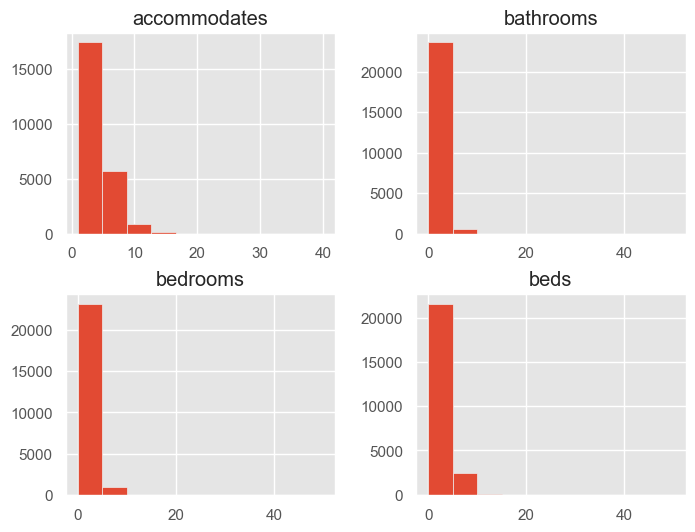

In [484]:
cape[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

## Categorical Features 

Categorical features will be explored and plotted, to gain insights and to determine whether or not they should be included in the final model.

Neighbourhood

Wanted to draw out maps but geopandas would not cooperate, but you will use boxplots to show that there is a difference in a where the home is situated. 

/var/folders/ld/nx6xl0lx1w19py7v7yc_ylp00000gn/T/ipykernel_9171/561322719.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


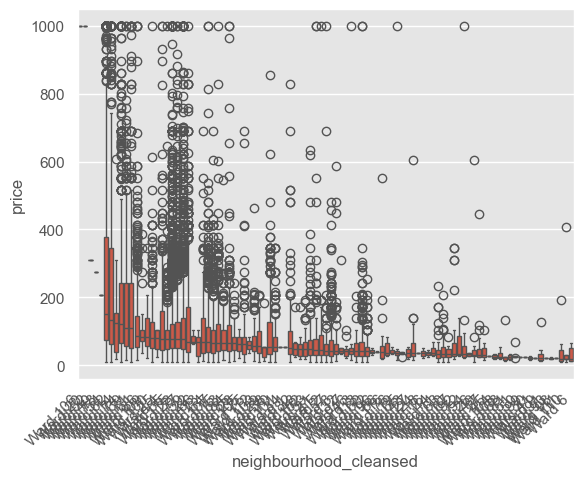

In [485]:
sort_price = cape.loc[(cape.price <= 1000) & (cape.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=cape.loc[(cape.price <= 1000) & (cape.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

In [486]:

# See if neighbourhood has a significant influence 
# cape.groupby('neighbourhood_cleansed').agg(
#     [np.size, np.sum, np.mean, np.std])


# cape.groupby('neighbourhood_cleansed').agg(
#     ['size', 'sum', 'mean'])


# type(cape)

# cape.groupby('neighbourhood_cleansed').agg(
#     [np.size, np.sum]
# )

# *q: this dont work, come back to this

Property and room types

Question: what are the most common property and room types?

Answer: about 43% of properties are apartments. The remainder are houses or more uncommon property types (e.g. 'bed and breakfast' or 'yurt').

About 76% of listings are entire homes (i.e. you are renting the entire property on your own). Most of the remainder are private rooms (i.e. you are renting a bedroom and possibly also a bathroom, but there will be other people in the property). Fewer than 1% are shared rooms (i.e. you are sharing a room with either the property owner or other guests).

In [487]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    cape[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

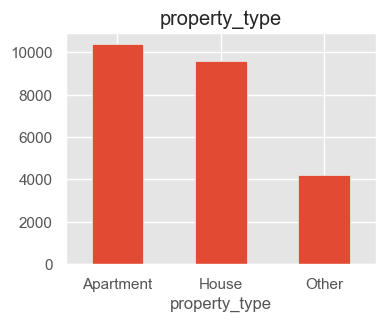

property_type
Apartment    0.42993
House        0.39627
Other        0.17380
Name: proportion, dtype: float64


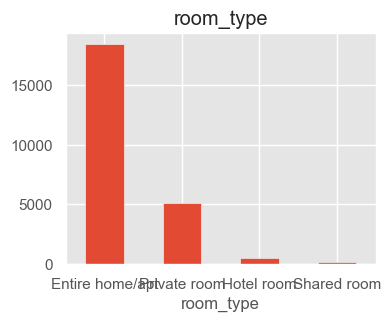

room_type
Entire home/apt    0.762643
Private room       0.210065
Hotel room         0.021751
Shared room        0.005541
Name: proportion, dtype: float64


In [488]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(4,3))
    print(cape[col].value_counts(normalize=True))

Reviews

Question: what is the distribution of reviews like?

Answer: for every review category, the majority of listings that have had a review have received a 10/10 rating for that category (or 95-100/100 overall).

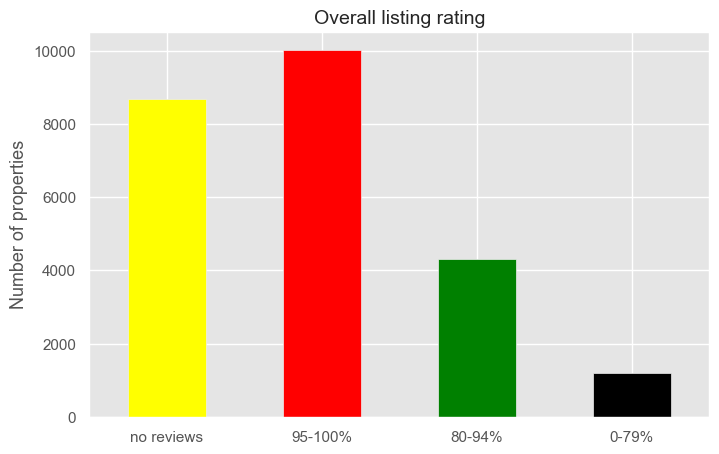

In [489]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)
cape['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['yellow', 'red', 'green', 'black' ], ax=ax)
ax.set_xticklabels(labels=['no reviews', '95-100%', '80-94%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

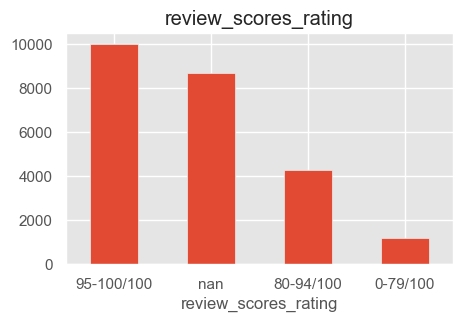

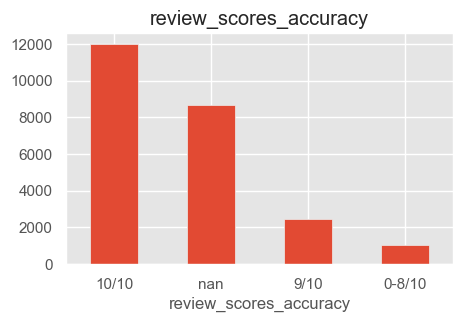

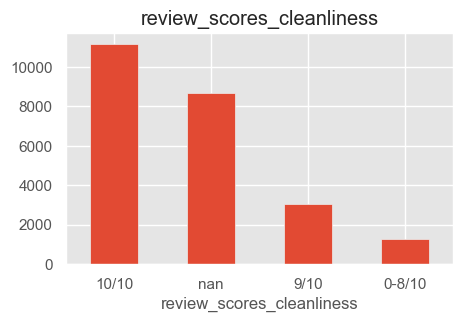

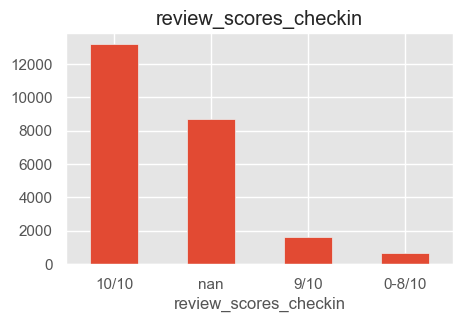

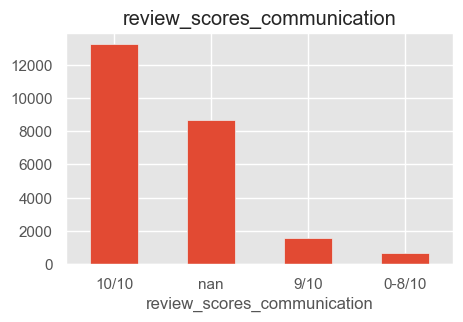

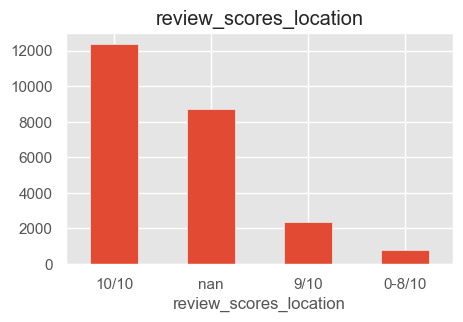

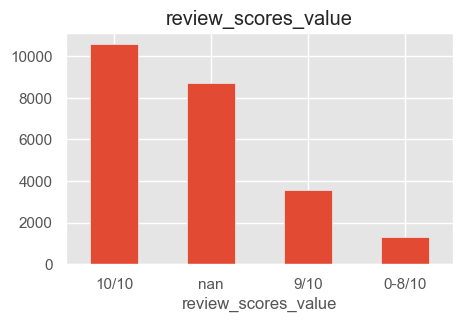

In [490]:
for col in list(cape.columns[cape.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

## Boolean (true or false) features 

In [491]:


def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    cape.groupby(col).size().plot(kind='bar', ax=ax1, color=['red', 'green'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    cape.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['red', 'green'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    
    plt.show()



Superhosts



Question: what proportion of Airbnb hosts are superhosts, and is it worth being one?

Answer: about 21% of hosts are superhosts. However, it does not seem to improve the median price per night of their Airbnb listings, so it is arguable whether or not it is worth it (from a financial perspective).


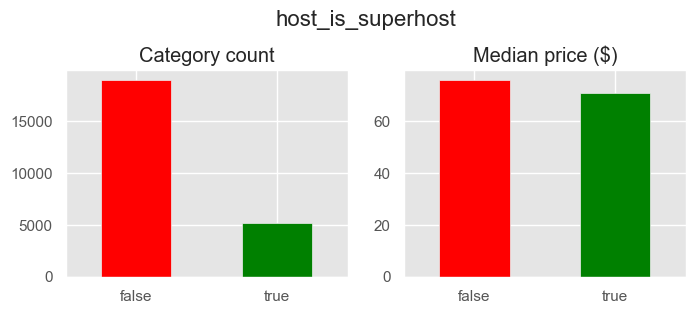

host_is_superhost
f    0.784353
t    0.215647
Name: proportion, dtype: float64


In [492]:
binary_count_and_price_plot('host_is_superhost')
print(cape.host_is_superhost.value_counts(normalize=True))

Host verification

Question: how many hosts are verified, and is it worth it? (a question often asked by hosts)

Answer: only about 27% of hosts are verified (e.g. by providing ID and verifying your phone number and email address), although it is something that hosts often think they are expected to do. Interestingly, however, despite the fact that one might expect the additional trust commanded by verified hosts to result in higher nightly prices, there is no real big difference between the median nightly prices of listings with verified and unverified hosts.

In [493]:
cape.host_identity_verified.value_counts(normalize=True)

host_identity_verified
f    0.72398
t    0.27602
Name: proportion, dtype: float64

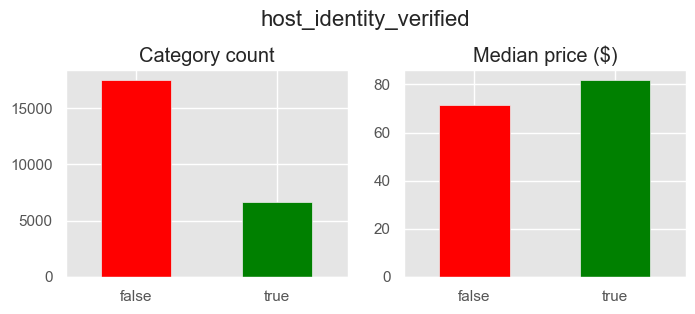

In [494]:
binary_count_and_price_plot('host_identity_verified')

Instant booking

Question: how many properties are instant bookable (i.e. able to be booked without messaging the host first), and is it worth it?

Answer: only about 52% of properties are instant bookable. However, the added convenience does not seem to have any effect on the median price per night.

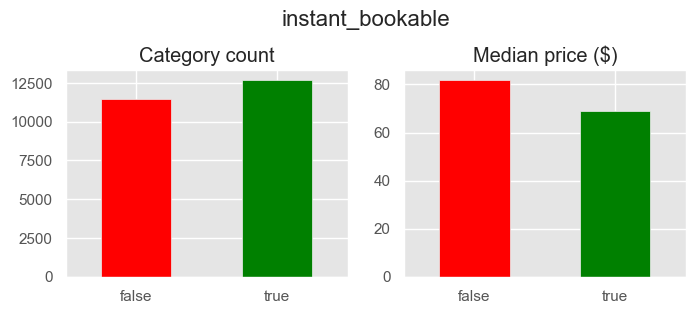

instant_bookable
t    0.525493
f    0.474507
Name: proportion, dtype: float64


In [495]:
binary_count_and_price_plot('instant_bookable')
print(cape.instant_bookable.value_counts(normalize=True))

Amenities

Question: which amenities are common, and which increase the price of an Airbnb listing?

High Impact Amenties 

1.Allowing customers to smoke diminishes the value of your property a decent amount 

2.Internet,Hot Tub,Pool great way to increase your price. 

3. AC is important 

4. BBQ

5.Balcony 

6.Nature views 
7.TV
8.Child Friendly 


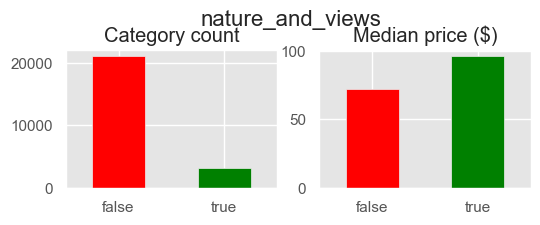

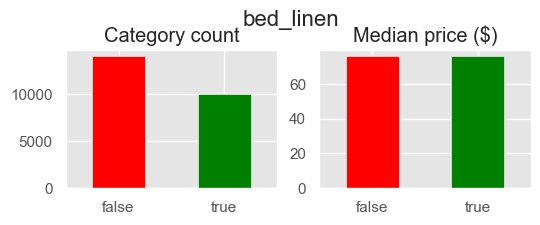

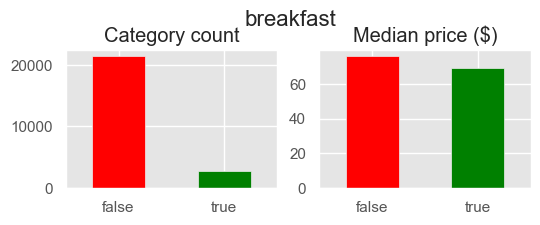

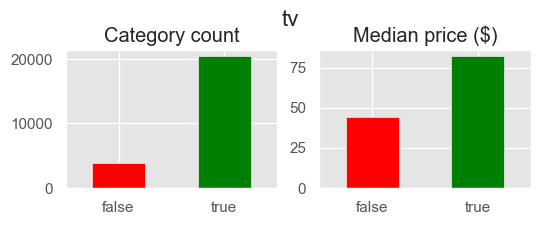

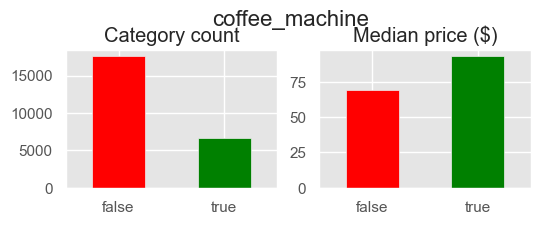

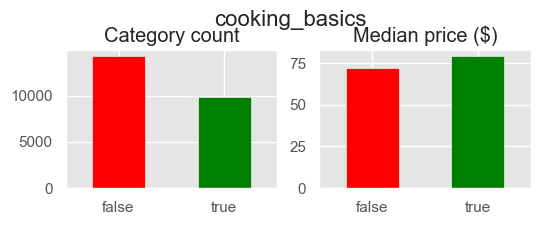

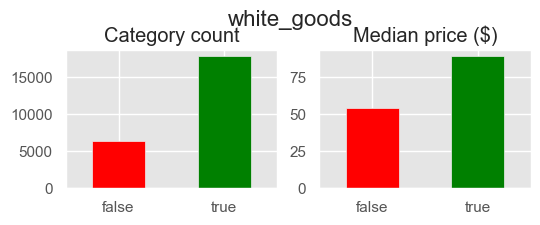

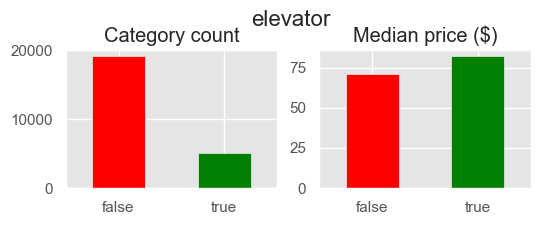

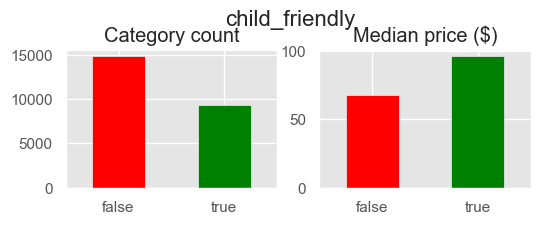

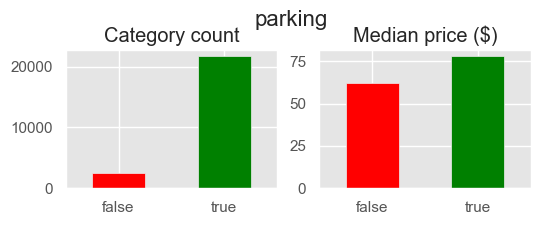

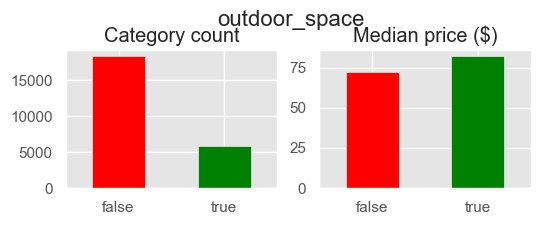

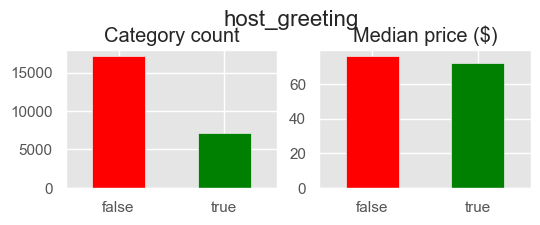

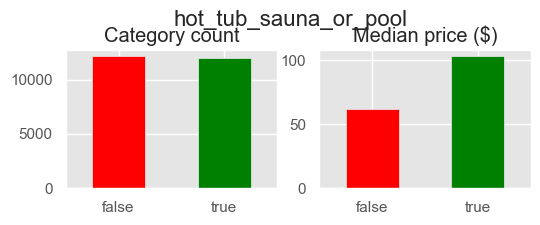

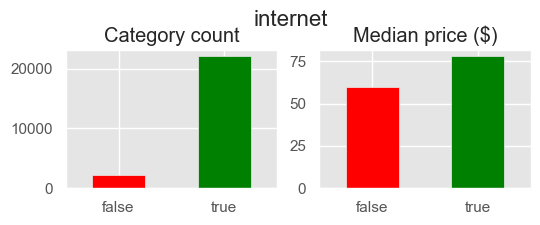

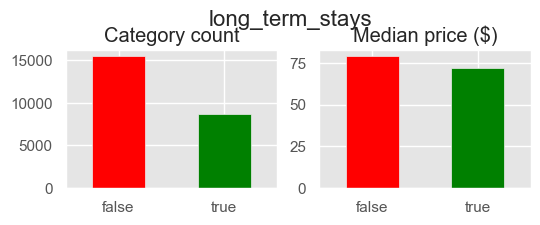

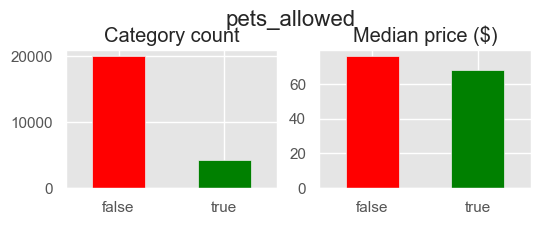

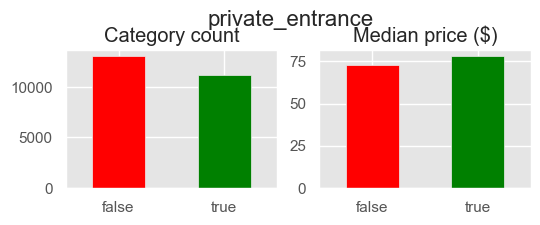

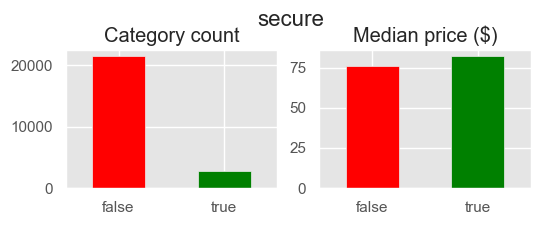

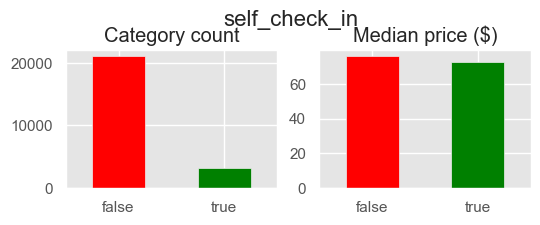

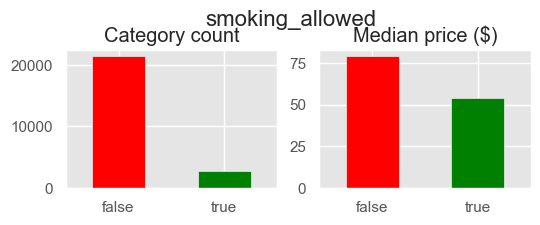

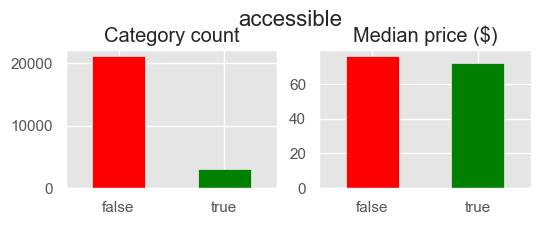

In [496]:
for col in cape.iloc[:,34:-2].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

#  Preparing the data for modeling

In [497]:
transformed_df = pd.get_dummies(cape)

In [498]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

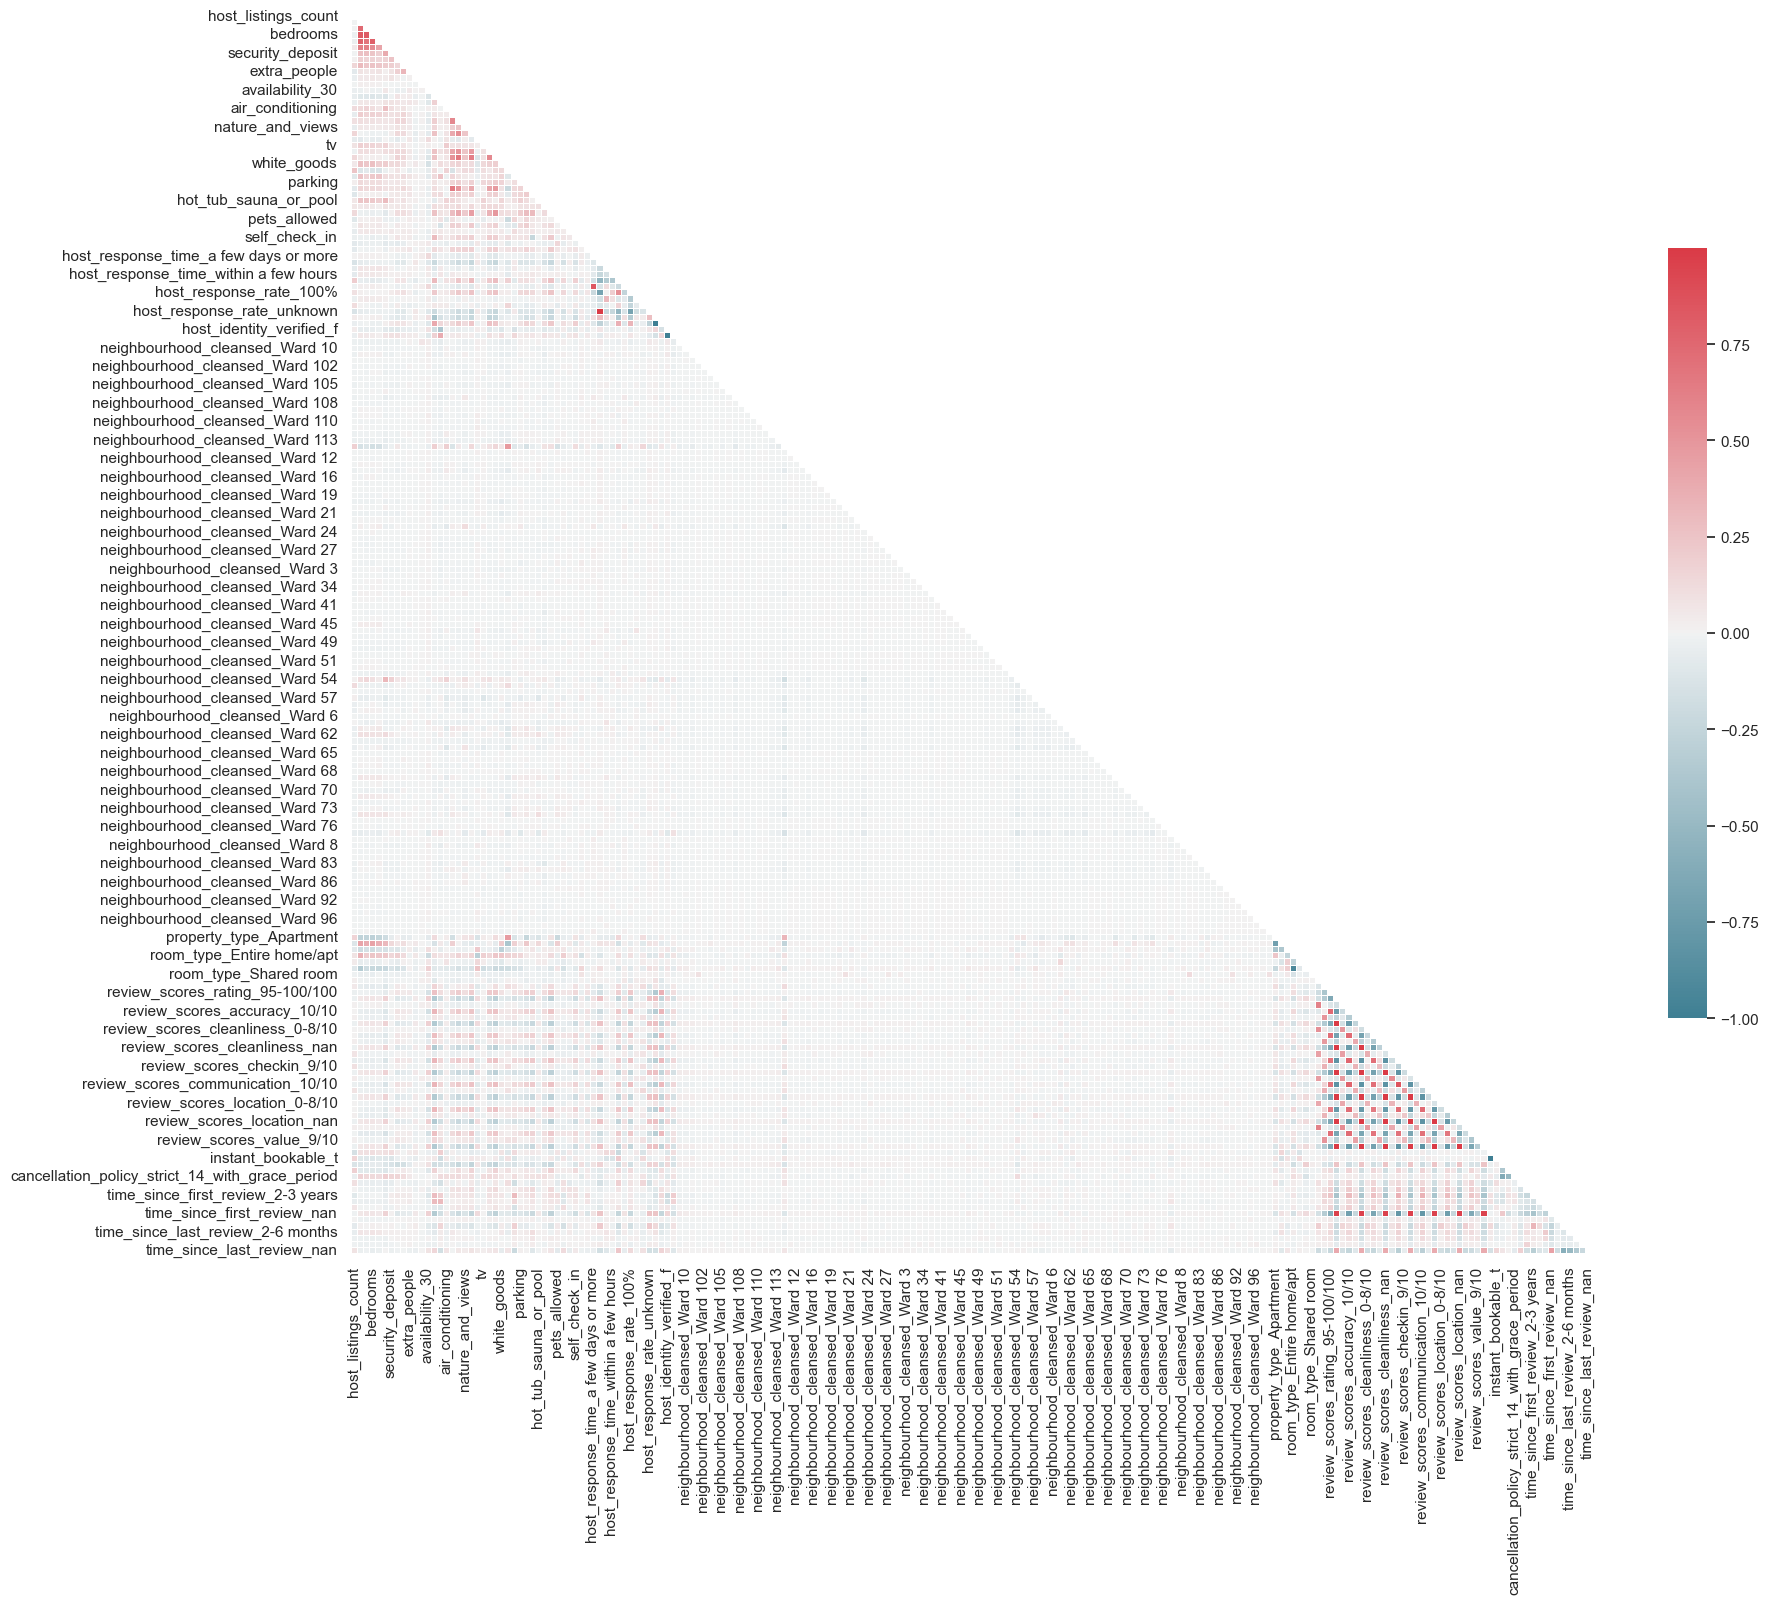

In [499]:
multi_collinearity_heatmap(transformed_df, figsize=(20,20))

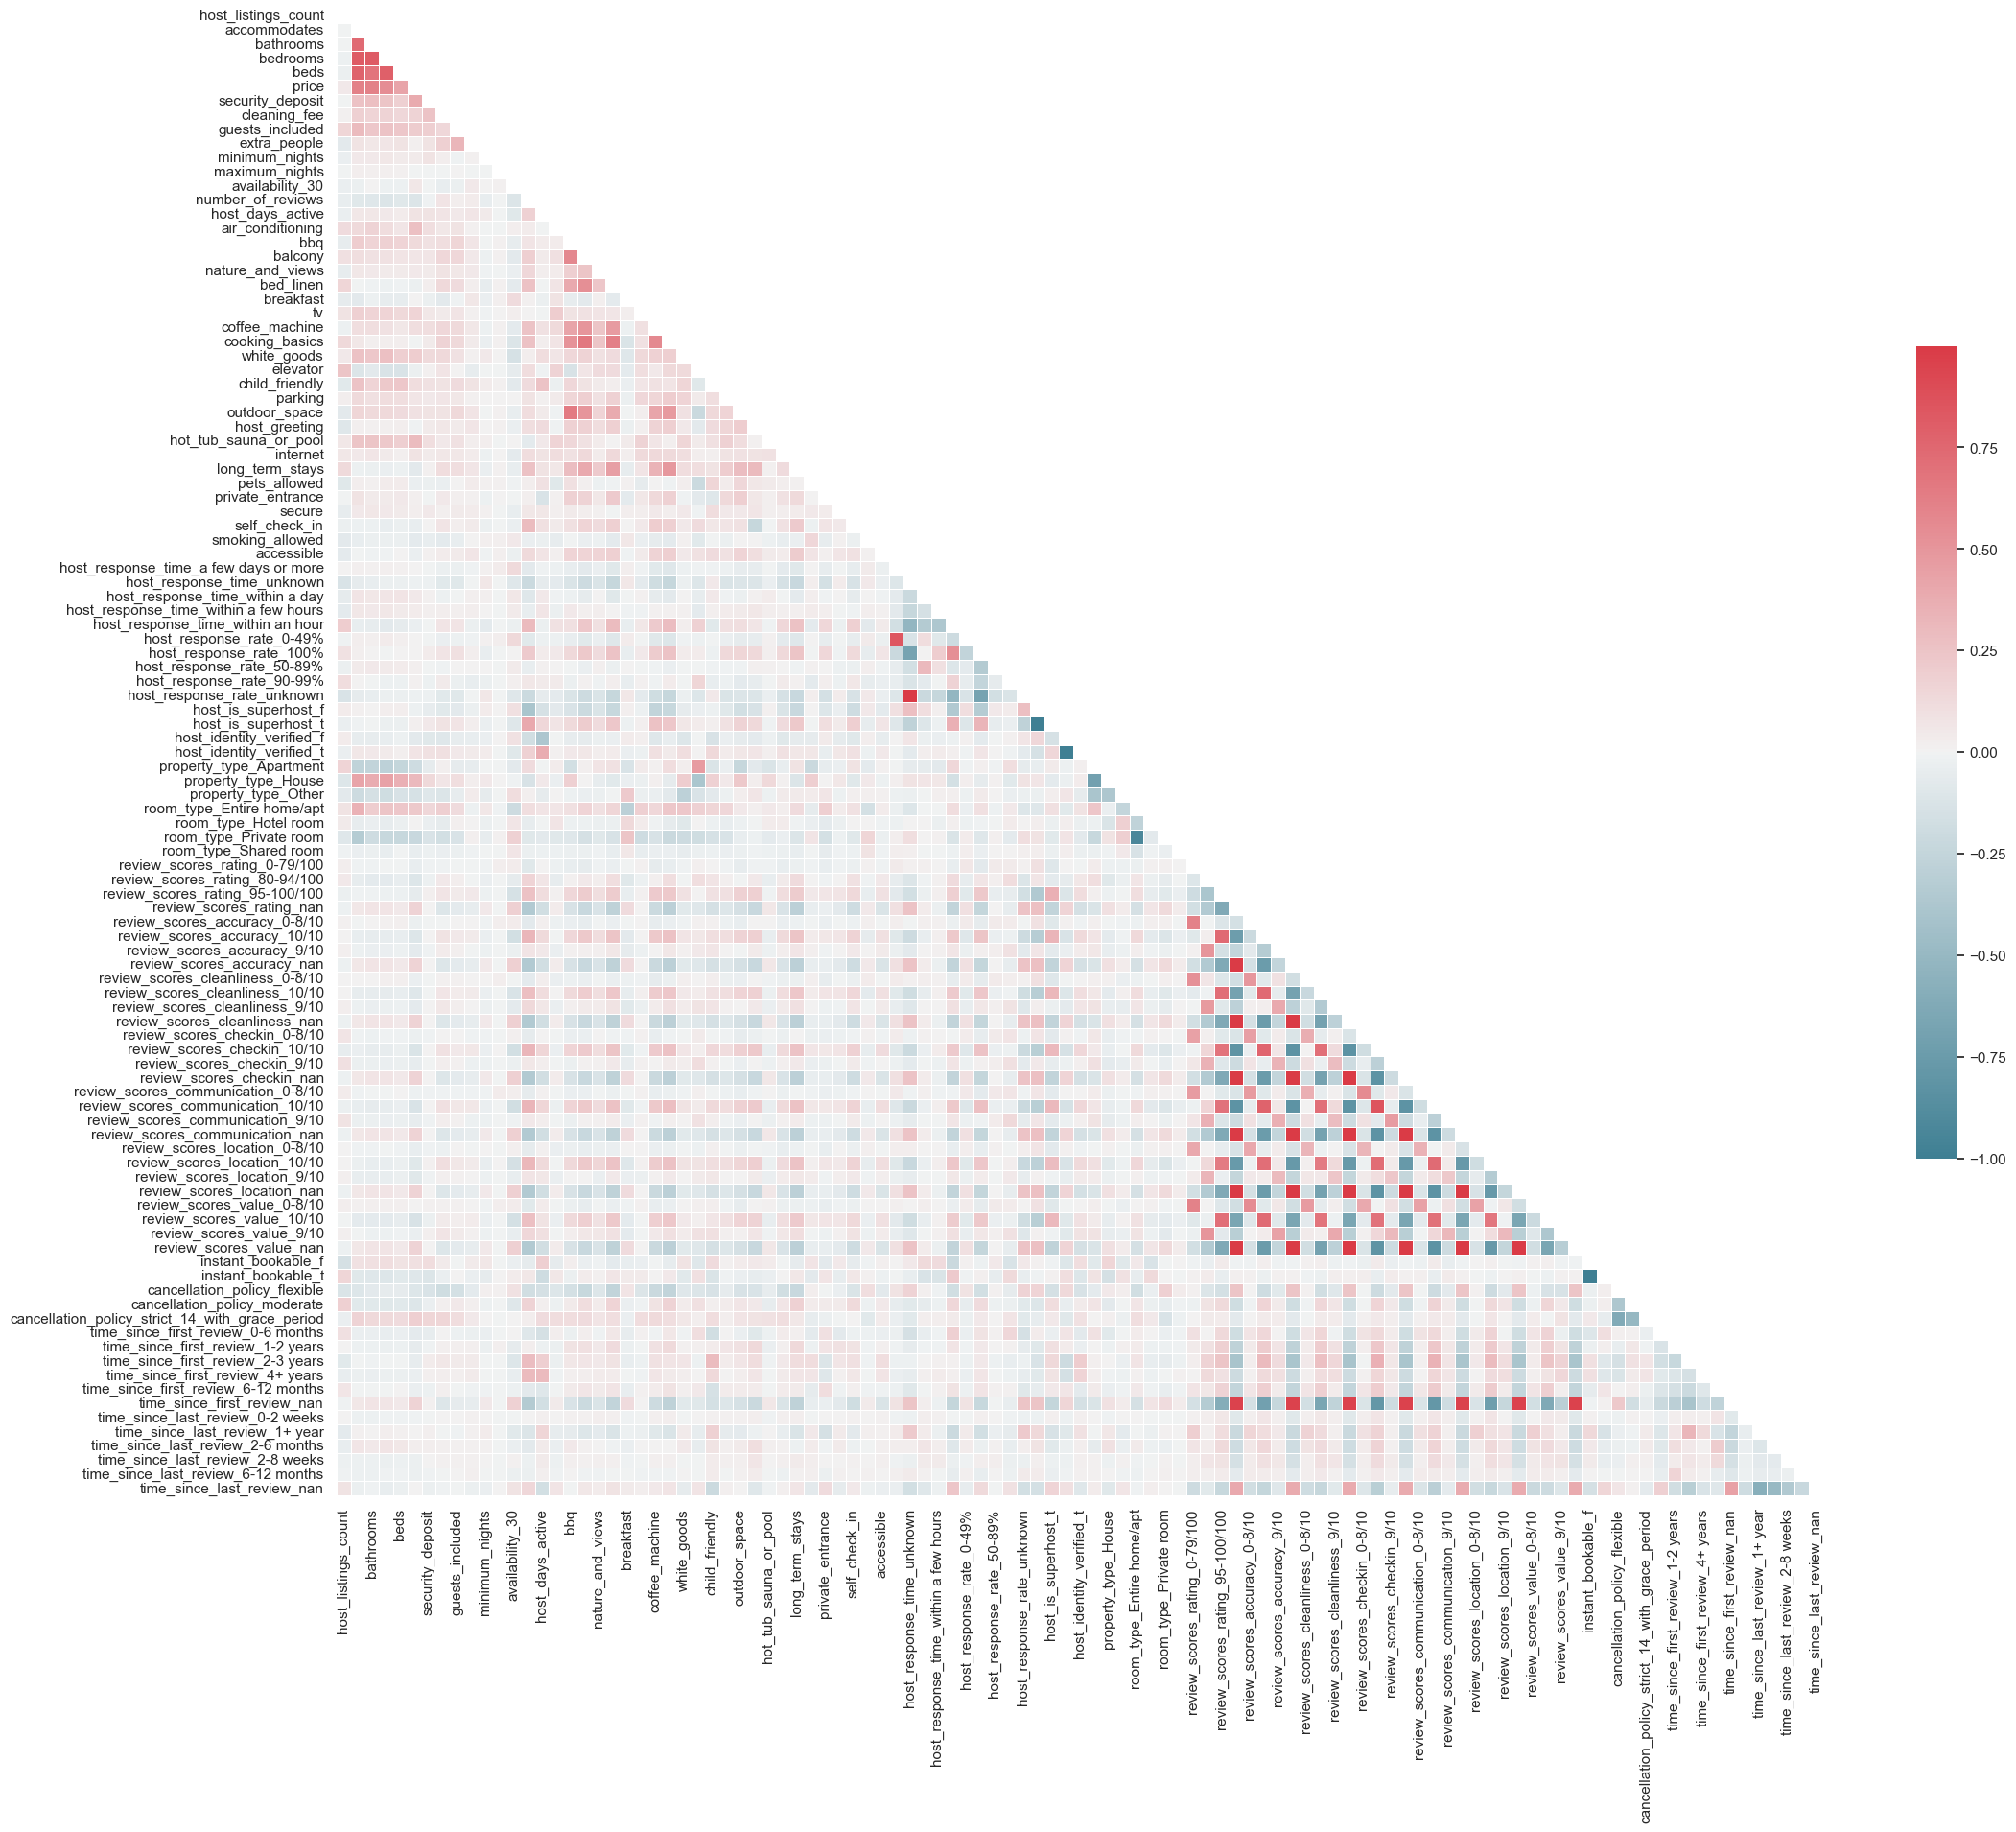

In [500]:
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('neighbourhood_cleansed')]), axis=1), figsize=(25,22))

In [501]:
# Dropping collinear features
to_drop = ['beds',
           'bedrooms',
           'guests_included', 
           'host_response_rate_unknown',
           'host_response_rate_0-49%',
           'property_type_Apartment',
           'room_type_Private room']
to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('nan')]))

transformed_df.drop(to_drop, axis=1, inplace=True)

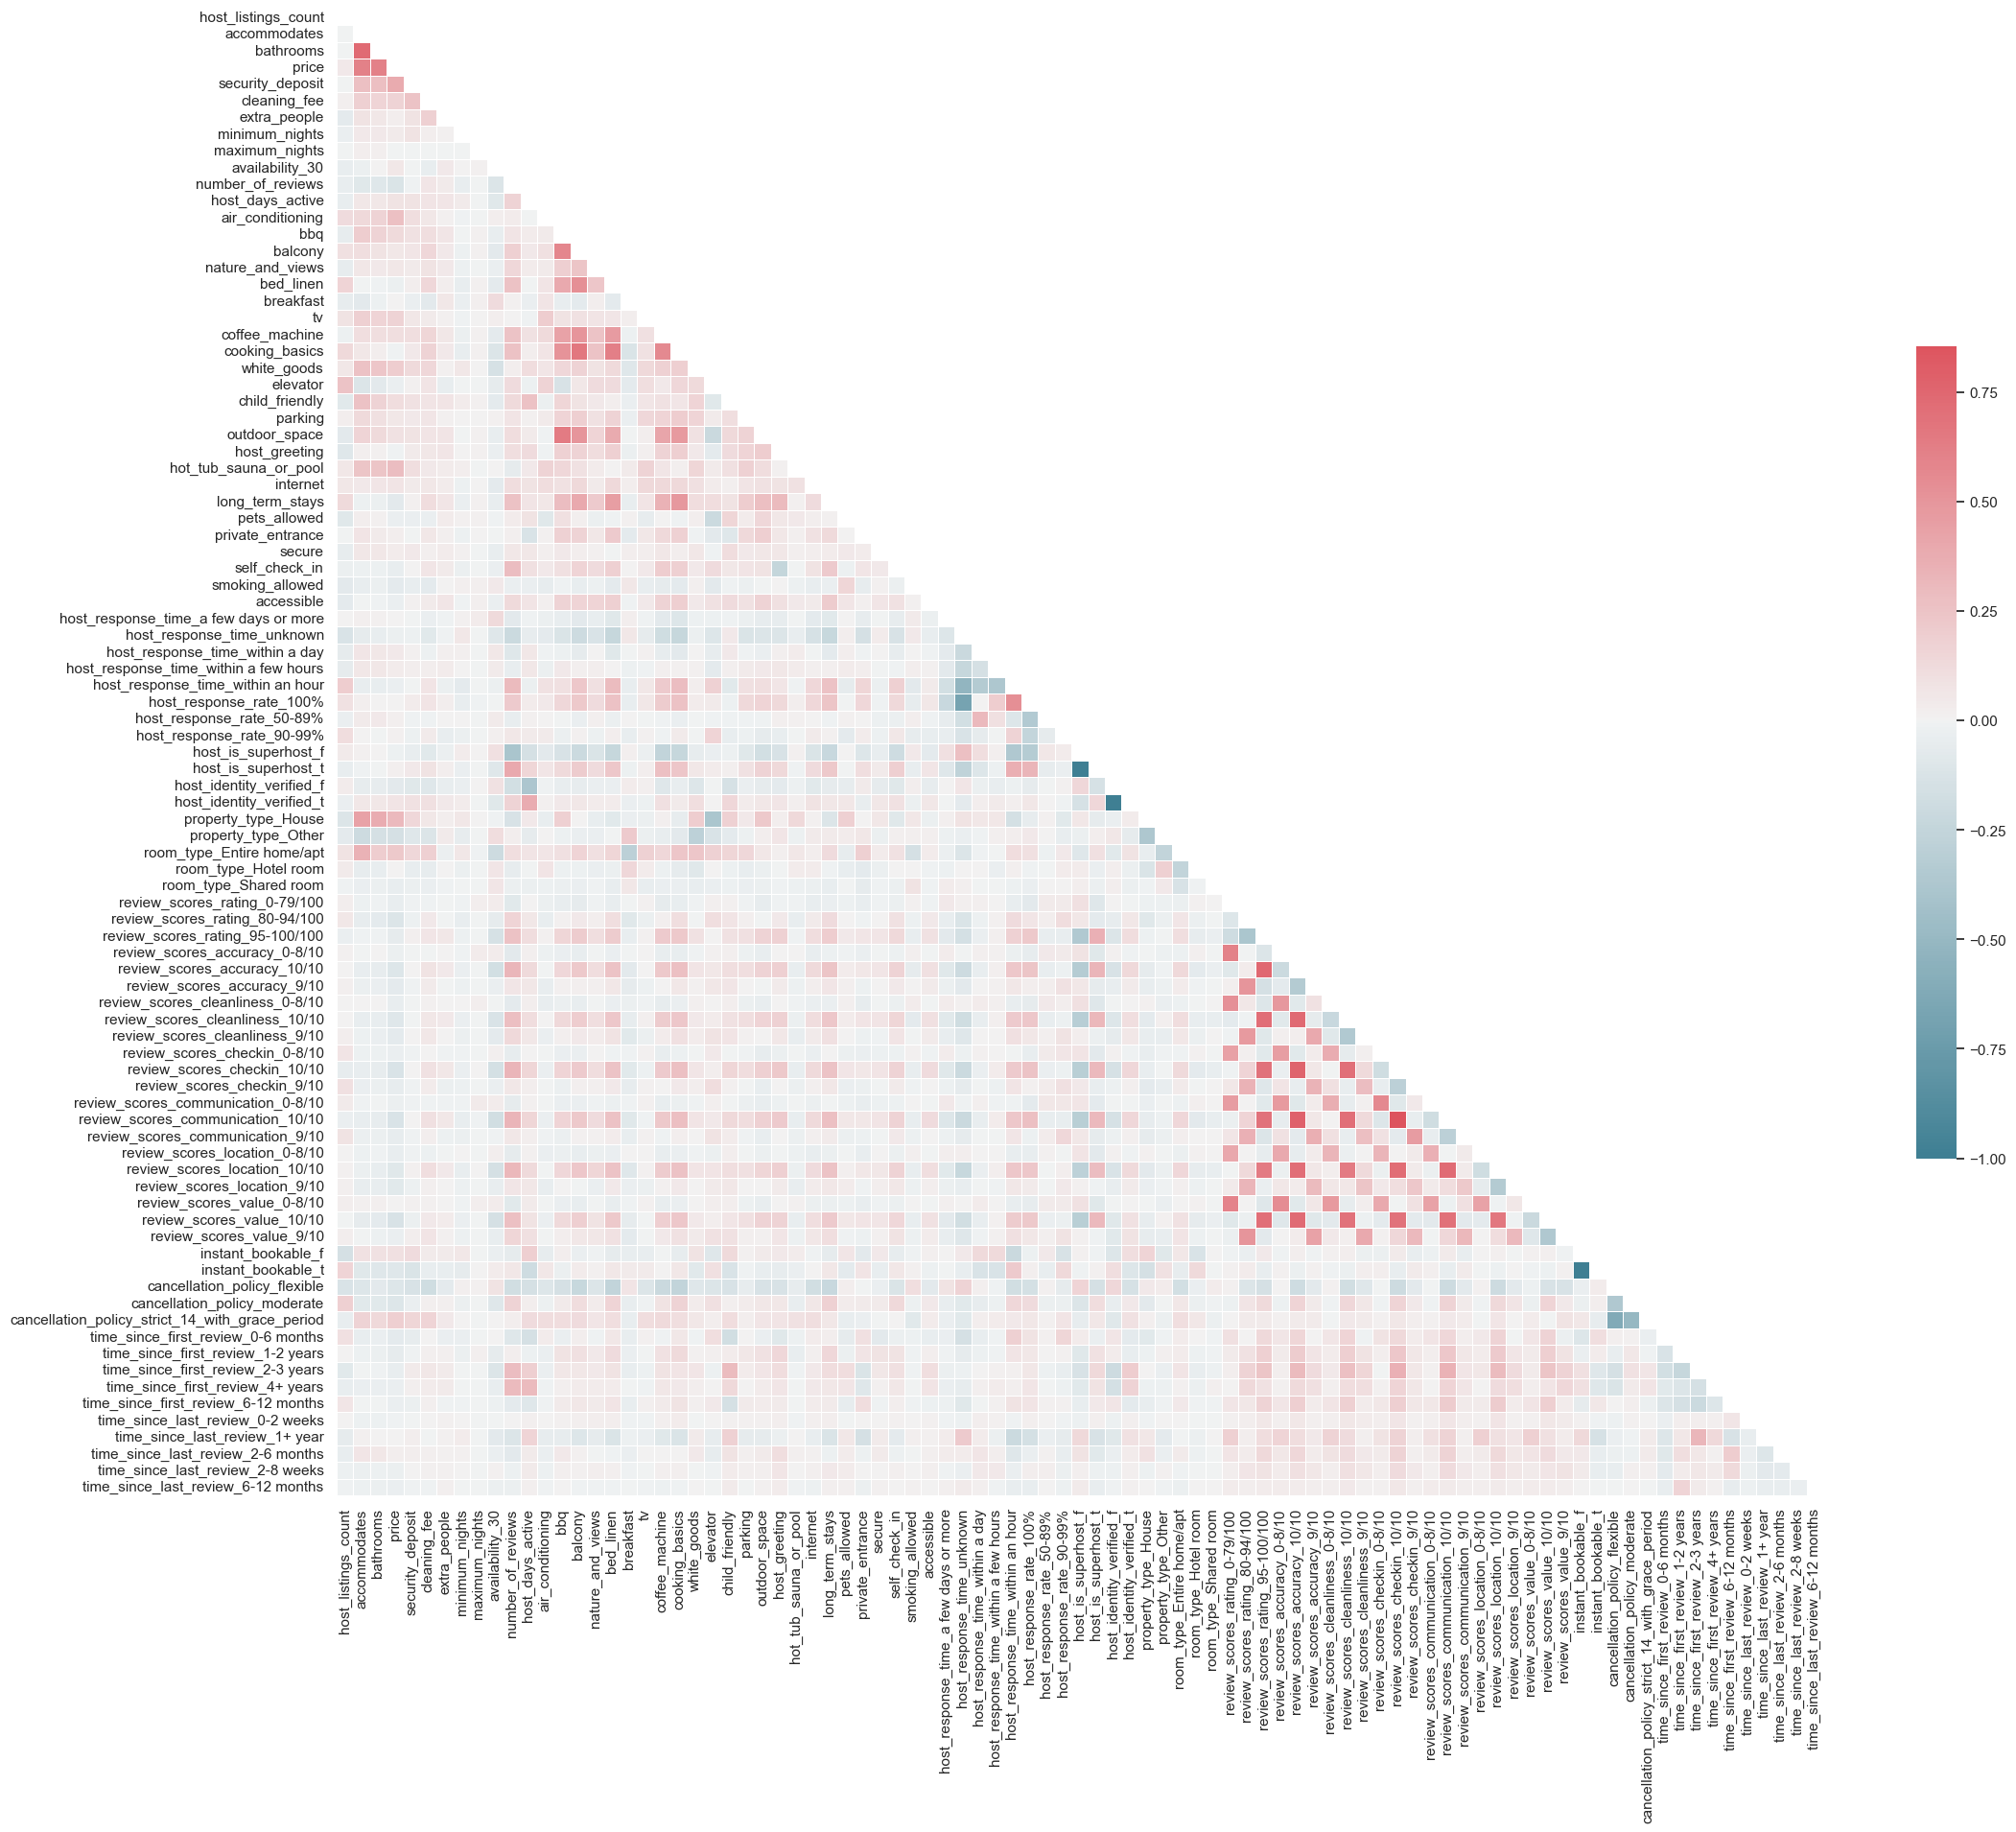

In [502]:
# Final assessment of multi-collinearity
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('neighbourhood_cleansed')]), axis=1), figsize=(25,22))

Standardising and normalising

In [503]:
numerical_columns = ['accommodates', 'availability_30', 'bathrooms', 'cleaning_fee', 'extra_people', 'host_days_active', 'host_listings_count', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price', 'security_deposit']

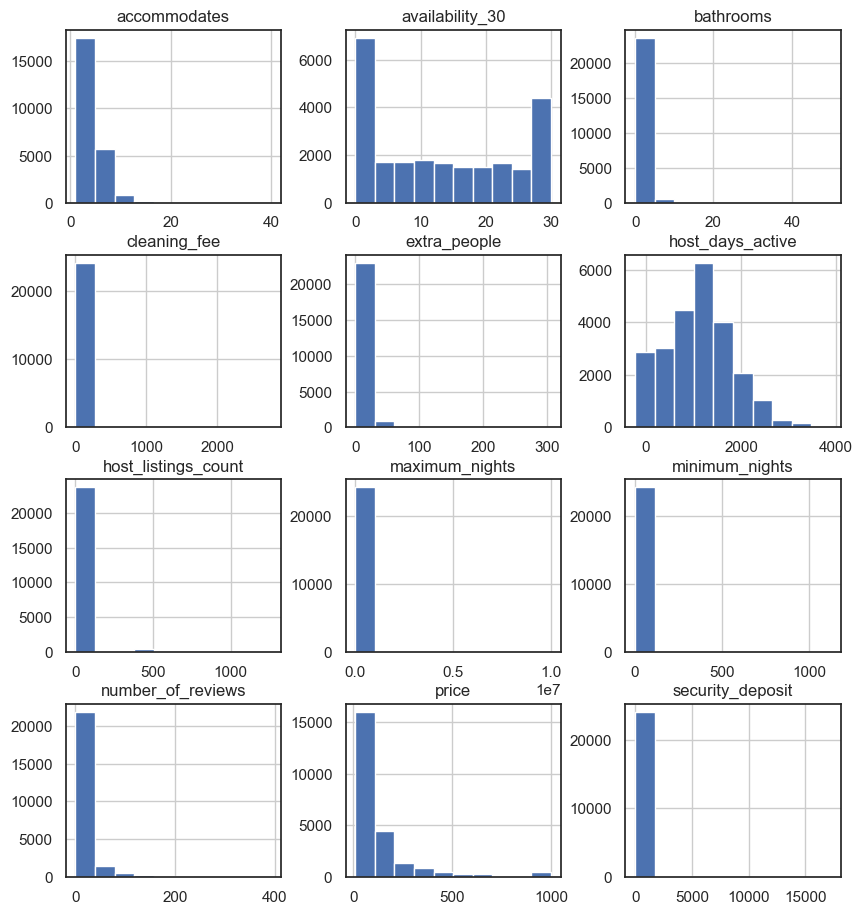

In [504]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [505]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_30', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

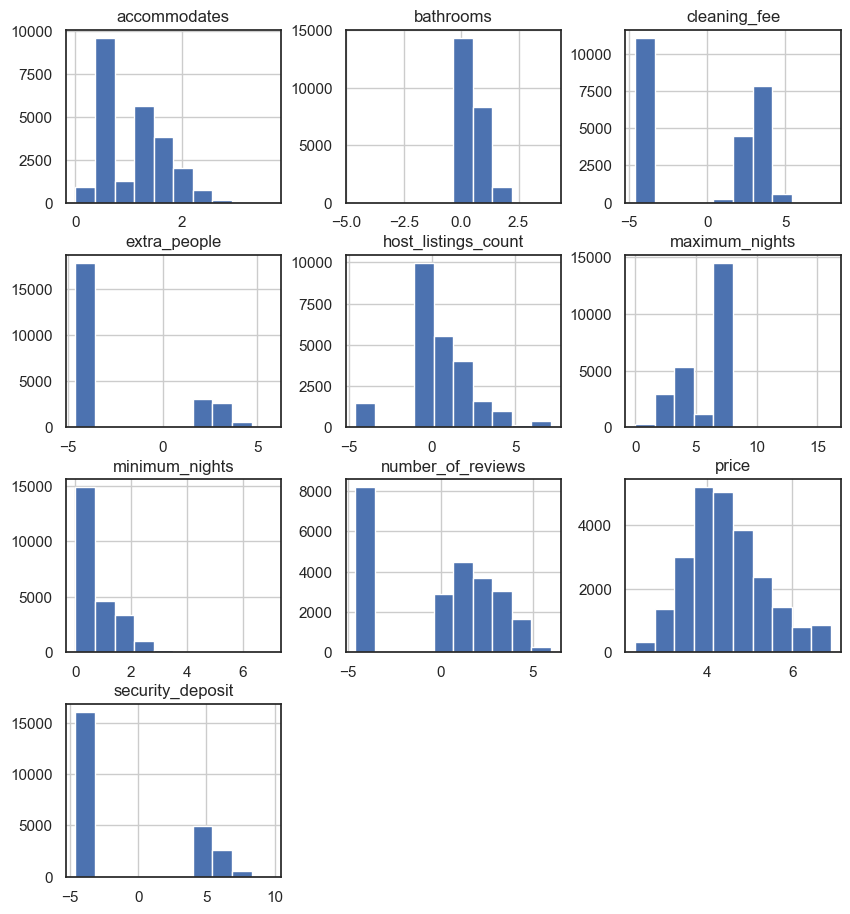

In [506]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [507]:
transformed_df2 = transformed_df.copy

In [508]:
# Separating X and y
X = transformed_df.drop('price', axis=1)
y = transformed_df.price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

# Models 

Now that the data preprocessing is over, we can start applying different Supervised Machine Learning models. We will compare two models:

* A Spatial Hedonic Price Model (OLS Regression), with the LinearRegression from Scikit-Learn library
* The Gradient Boosting method, with the XGBRegressor from the XGBoost library

The evaluation metrics used will be mean squared error (for loss) and r-squared (for accuracy).

In [509]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Model 1: Spatial Hedonic Price Model (HPM)


The hedonic model involves regressing observed asking-prices for the listing against those attributes of a property hypothesized to be determinants of the asking-price. It comes from hedonic price theory which assumes that a commodity, such as a house can be viewed as an aggregation of individual components or attributes (Griliches, 1971). Consumers are assumed to purchase goods embodying bundles of attributes that maximize their underlying utility functions (Rosen, 1974).

In addition to the characteristics of the Airbnb listings, we add location features as they have been shown to be important factors in influencing the price (see here, here, here and here for examples). Ideally, Lagrange multiplier tests should be conducted to verify if there is spatial lag in the dependent variable and therefore a spatial lag model (see this post for spatial regression using Pysal) is preferred for estimating a spatial HPM. However, for the purposes of this post, we are only using a conventional OLS model for hedonic price estimation that includes spatial and locational features, but not a spatial lag that accounts for spatial dependence.

So, the first explanatory variables are the listings characteristics (acommodates, bathrooms, etc) and our second group of explanatory variables based on spatial and locational features are Score, which is the network distance to 5th nearest venue we computed with Pandana; and Neighbourhood belonging, 1 if the listing belongs to the specified neighbourhood, 0 otherwise.


In [521]:
hpm_reg_start = time.time()

# Create instance of the model, `LinearRegression` function from 
# Scikit-Learn and fit the model on the training data:

hpm_reg = LinearRegression()  
hpm_reg.fit(X_train, y_train) #training the algorithm

# Now that the model has been fit we can make predictions by calling 
# the predict command. We are making predictions on the testing set:
training_preds_hpm_reg = hpm_reg.predict(X_train)
val_preds_hpm_reg = hpm_reg.predict(X_test)

hpm_reg_end = time.time()

print(f"Time taken to run: {round((hpm_reg_end - hpm_reg_start)/60,1)} minutes")

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, training_preds_hpm_reg),4))
print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_hpm_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_hpm_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_hpm_reg),4))

Time taken to run: 0.0 minutes

Training RMSE: 0.2316
Validation RMSE: 6.74041598956432e+22

Training r2: 0.7198
Validation r2: -7.804239398691344e+22


In [511]:

y_test_array = np.array(list(y_test))
val_preds_hpm_reg_array = np.array(val_preds_hpm_reg)
hpm_df = pd.DataFrame({'Actual': y_test_array.flatten(), 'Predicted': val_preds_hpm_reg_array.flatten()})
hpm_df

Actual  Predicted
0     3.988984   3.398564
1     4.615121   4.886807
2     3.295837   3.967245
3     4.060443   3.535226
4     3.555348   3.091823
...        ...        ...
4832  4.219508   3.741008
4833  4.094345   4.642218
4834  3.610918   4.473507
4835  4.488636   4.001065
4836  5.398163   5.568528

[4837 rows x 2 columns]

TypeError: annotate() missing 1 required positional argument: 'text'

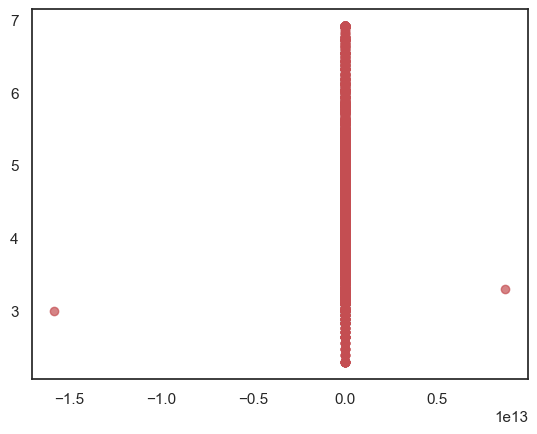

In [522]:

actual_values = y_test
plt.scatter(val_preds_hpm_reg, actual_values, alpha=.7,
            color='r') #alpha helps to show overlapping data
overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    (round(r2_score(y_test, val_preds_hpm_reg),4)),
                    (round(mean_squared_error(y_test, val_preds_hpm_reg))),4)
plt.annotate( s=overlay,xy=(5.5,2.5),size='x-large')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('SHP Regression Model')
plt.show()

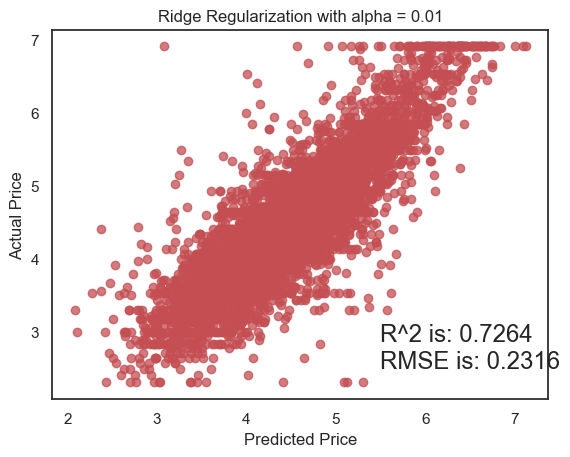

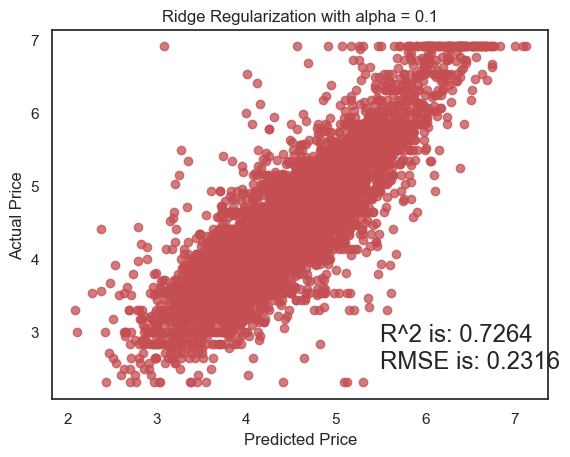

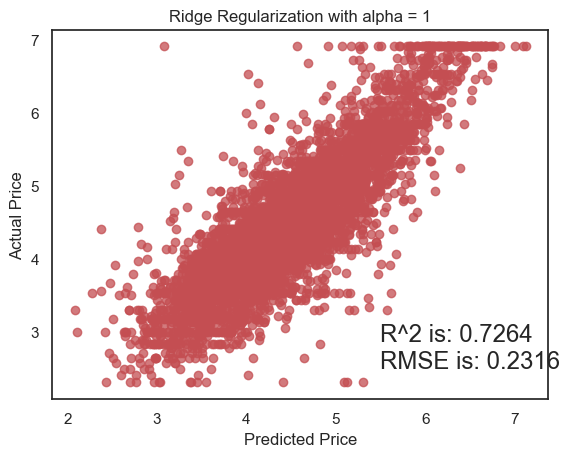

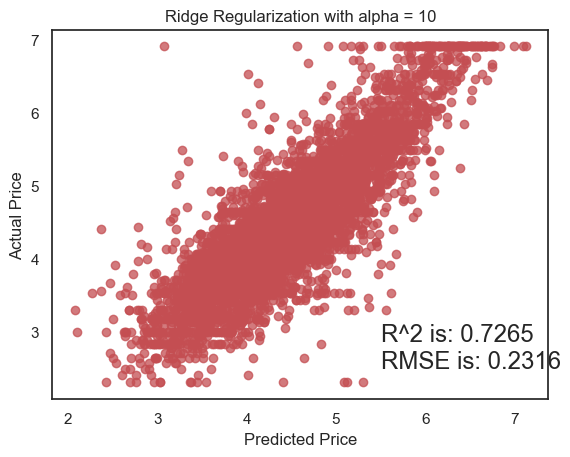

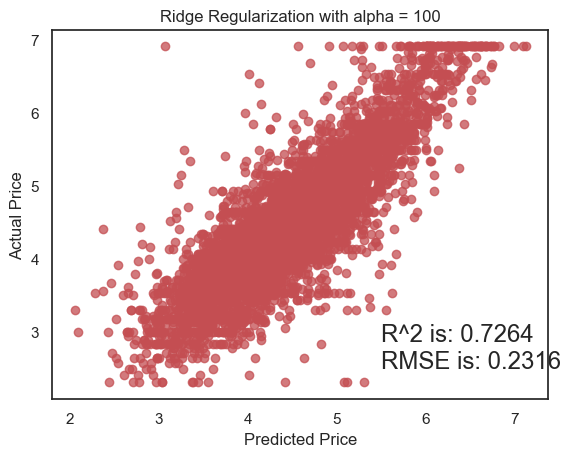

In [525]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='r')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                   round(ridge_model.score(X_test, y_test), 4),
                    round(mean_squared_error(y_train, training_preds_hpm_reg),4))
    plt.annotate( text=overlay,xy=(5.5,2.5),size='x-large')
    plt.show()

Model 2: Gradient boosted decision trees

In [526]:

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)


print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))


Training MSE: 0.1056
Validation MSE: 0.192

Training r2: 0.8722
Validation r2: 0.7777


In [528]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg.head(10)

weight
accommodates                                     0.118839
bathrooms                                        0.099806
neighbourhood_cleansed_Ward 54                   0.066658
air_conditioning                                 0.048205
room_type_Entire home/apt                        0.045346
hot_tub_sauna_or_pool                            0.025628
room_type_Hotel room                             0.024519
cancellation_policy_strict_14_with_grace_period  0.019849
neighbourhood_cleansed_Ward 115                  0.018247
tv                                               0.015803

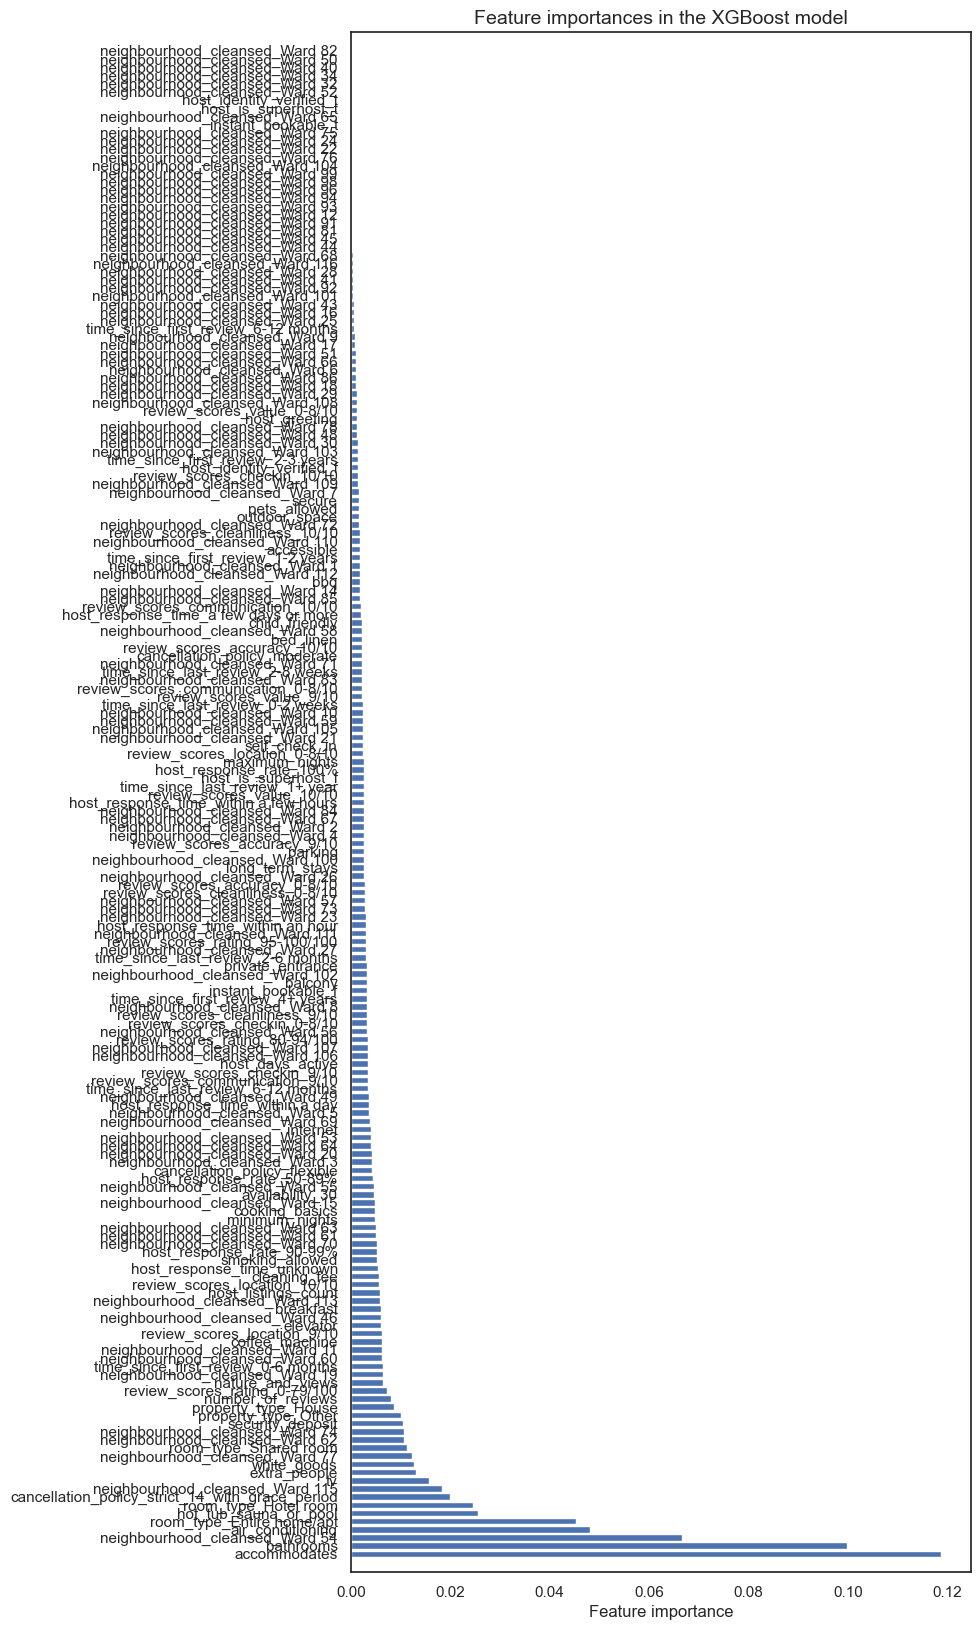

In [529]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [530]:
all_review = list(X_train.columns[X_train.columns.str.startswith("review_scores")])
review_to_keep = list(X_train.columns[X_train.columns.str.startswith("review_scores_rating")])
review_to_drop = [x for x in all_review if x not in review_to_keep]

X_train_short = X_train.drop(review_to_drop, axis=1)
X_test_short = X_test.drop(review_to_drop, axis=1)

In [532]:
hpm_reg_start = time.time()

# Create instance of the model, `LinearRegression` function from 
# Scikit-Learn and fit the model on the training data:

hpm_reg2 = LinearRegression()  
hpm_reg2.fit(X_train, y_train) #training the algorithm

# Now that the model has been fit we can make predictions by calling 
# the predict command. We are making predictions on the testing set:
training_preds_hpm_reg2 = hpm_reg2.predict(X_train)
val_preds_hpm_reg2 = hpm_reg2.predict(X_test)

hpm_reg_end = time.time()

print(f"Time taken to run: {round((hpm_reg_end - hpm_reg_start)/60,1)} minutes")

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, training_preds_hpm_reg2),4))
print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_hpm_reg2),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_hpm_reg2),4))
print("Validation r2:", round(r2_score(y_test, val_preds_hpm_reg2),4))

Time taken to run: 0.0 minutes

Training RMSE: 0.2316
Validation RMSE: 6.74041598956432e+22

Training r2: 0.7198
Validation r2: -7.804239398691344e+22


In [519]:
xgb_reg_start = time.time()

xgb_reg2 = xgb.XGBRegressor()
xgb_reg2.fit(X_train, y_train)
training_preds_xgb_reg2 = xgb_reg2.predict(X_train)
val_preds_xgb_reg2 = xgb_reg2.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg2),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg2),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg2),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg2),4))

Time taken to run: 0.0 minutes

Training MSE: 0.1056
Validation MSE: 0.192

Training r2: 0.8722
Validation r2: 0.7777


Final model selection

Overall, the XGBoost model is the best model. 

Conclusions and Recommendations


The best performing model was able to predict 75.04% of the variation in price with an RMSE of 0.2155. Which means we still have a remaining 24.95% unexplained. This could be due to several other features that are not part of our dataset or the need to analyse our features more closely.

Future Work
* comparsion to other cities 
* Crime data attached to locations 
* Computer vision to analyze how nice the interiors are